# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1145]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


from sklearn import metrics
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [1146]:
data = pd.read_csv("C:\\Users\\Rucha\\Documents\\DSBA Practice\\Supervised_learning_classification\\Supervised_learning_classification_Project\\INNHotelsGroup.csv")

In [1147]:
# copying data to another variable to avoid any changes to original data
df1 = data.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [1148]:
df1.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [1149]:
df1.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


-  The dataset contains detailed information about the various hotel bookings.

### Understand the shape of the dataset.

In [1150]:
df1.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns 

### Check the data types of the columns for the dataset.

In [1151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Dependent variable is the `booking_status` which is of categorical type.
* Booking_ID,type_of_meal_plan,room_type_reserved, market_segment_type,booking_status are of categorical type while other variables are of integer type.
* There are no missing values in the dataset.

### Checking for duplicate values

In [1152]:
df1.duplicated().sum()

0

- There are no duplicate values in the dataset.

### Checking for missing values

In [1153]:
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values in the dataset

### Statistical summary

In [1154]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* `no_of_adults`: Average number of adults in the dataset is around 2, no_of_adults has a range from 0 to 4.
* `no_of_week_nights`: The average number of week nights spent in the hotel room is 2.There is a wide range from 0 to 17 nights. There's a huge difference in the 75th percentile and maximum value indicating the presence of outliers
* `no_of_previous_cancellations`: There's a huge difference in the 75th percentile and maximum value of    no_of_previous_cancellations indicating the presence of outliers.Also 75% of the observations are 0.
* `lead_time`:There is a huge  difference in the 75th percentile and the maximum value indicating the presence of outliers.
* `avg_price_per_room`: On average the price per room is 103 euros.A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**The below functions need to be defined to carry out the EDA.**

In [1155]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1156]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1157]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [1158]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [1159]:
df1.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [1160]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations on avg_price_per_room

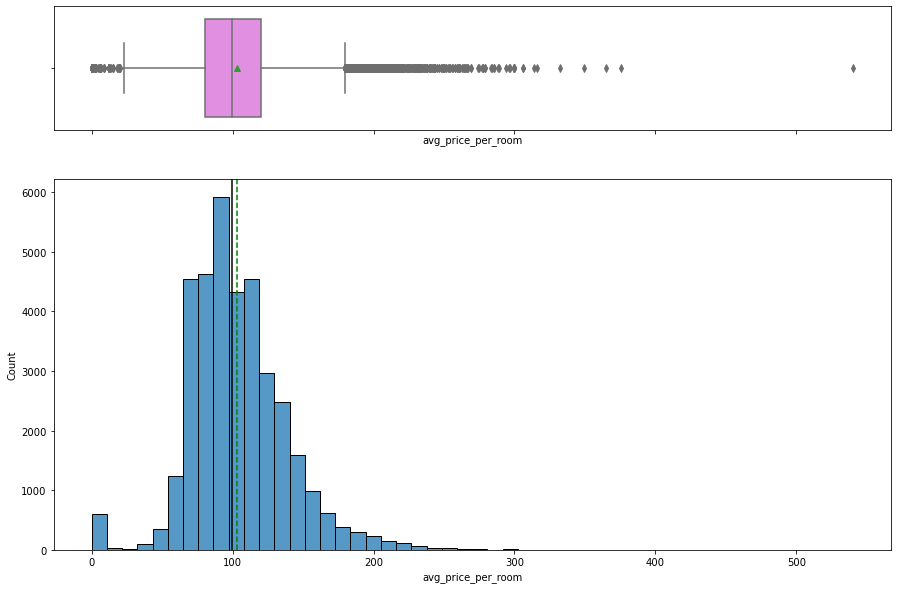

In [1161]:
histogram_boxplot(df1, "avg_price_per_room", bins=50)

* Few of the average prices per room  are extremely low while some of them are extremely high which are indicated by the outliers present at both ends
* The average price per room is approximately 100 euros on an average

In [1162]:
df1[df1["avg_price_per_room"] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [1163]:
df1.loc[df1["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* There are some promotional offers for the complimentary and online market segments types as the average price per room is zero

In [1164]:
# Calculating the 25th quantile
Q1 = df1["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = (df1["avg_price_per_room"].quantile(0.75))  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker



179.55

In [1165]:
# assigning the outliers the value of upper whisker
df1.loc[df1["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Observations on no_of_week_nights                         

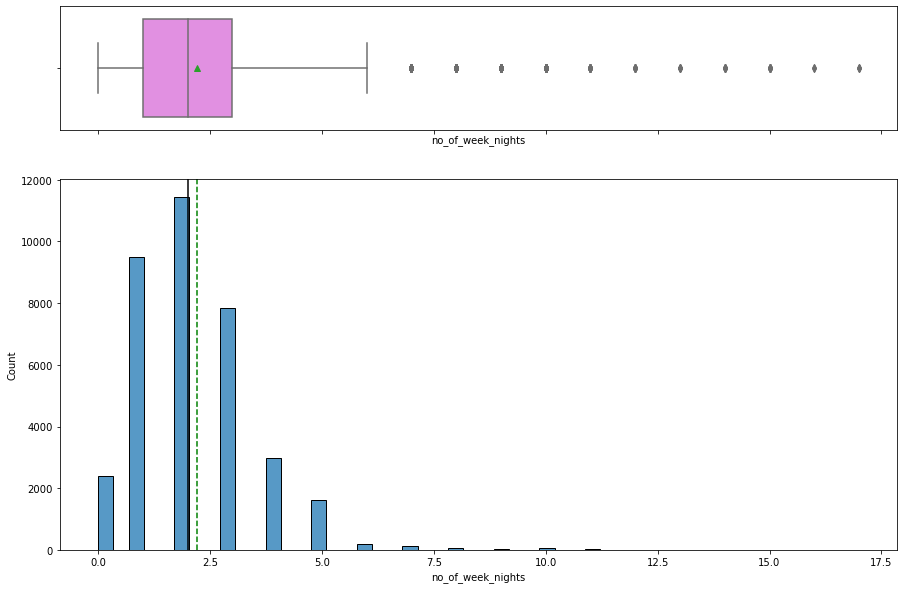

In [1166]:
histogram_boxplot(df1, "no_of_week_nights", bins=50)

* The distribution of no of week nights is highly right skewed

#### Observations on lead_time                                 

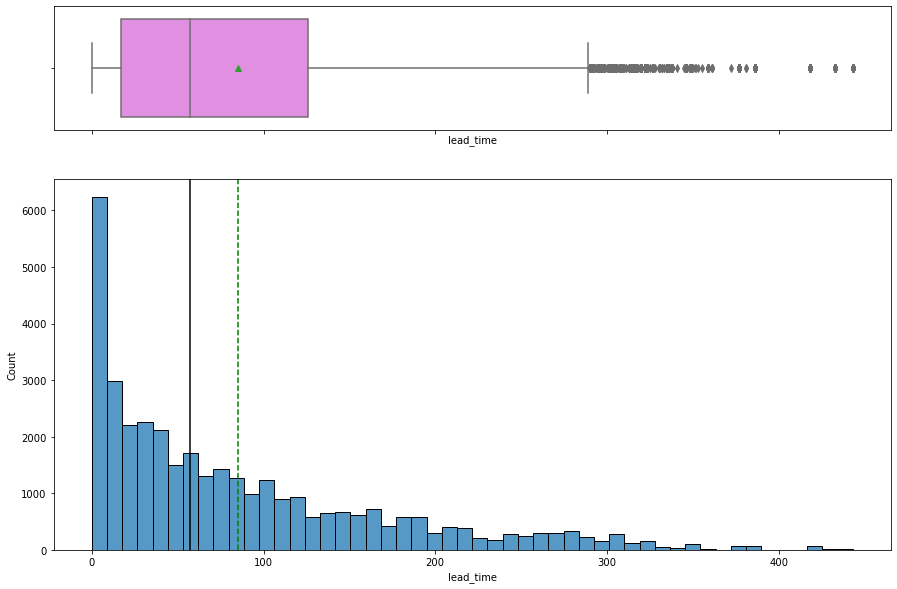

In [1167]:
histogram_boxplot(df1, "lead_time", bins=50)

* The distribution of no of lead time is highly right skewed

#### Observations on no_of_special_requests                

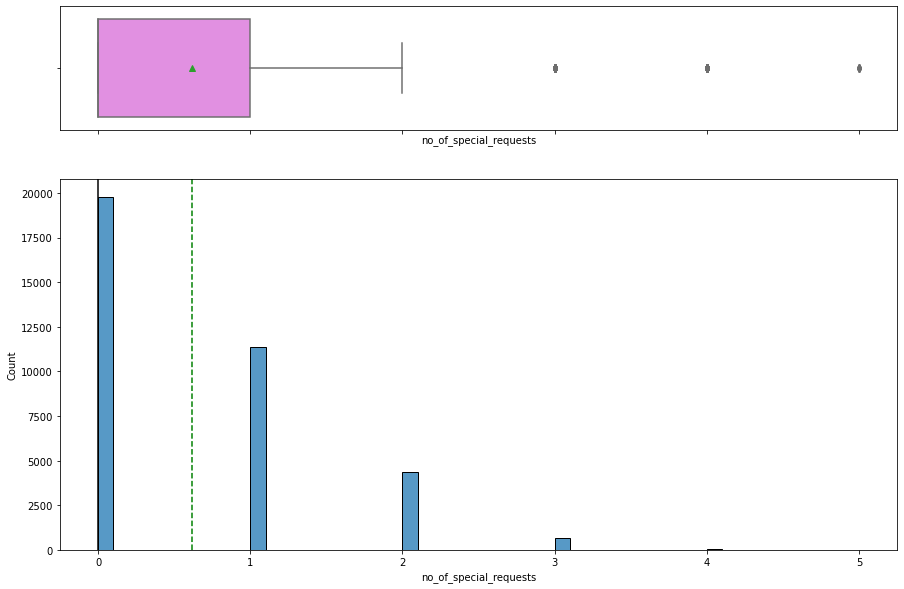

In [1168]:
histogram_boxplot(df1, "no_of_special_requests", bins=50)

* The distribution of no of special requests is highly right skewed

In [1169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [1170]:
df1['Booking_ID'].value_counts()

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

In [1171]:
df1['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [1172]:
df1['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [1173]:
df1['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [1174]:
df1['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [1175]:
df1['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [1176]:
df1['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [1177]:
df1['lead_time'].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

In [1178]:
df1['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [1179]:
df1['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [1180]:
df1['arrival_date'].value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

In [1181]:
df1['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [1182]:
df1['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [1183]:
df1['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [1184]:
df1['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [1185]:
df1['avg_price_per_room'].value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

In [1186]:
df1['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

In [1187]:
df1['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

#### Observations on Meal plan Type                       

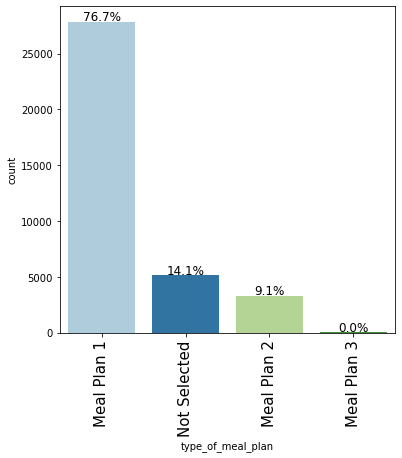

In [1188]:
labeled_barplot(df1, "type_of_meal_plan", perc=True)

* Meal plan 1 is the most prefered meal type

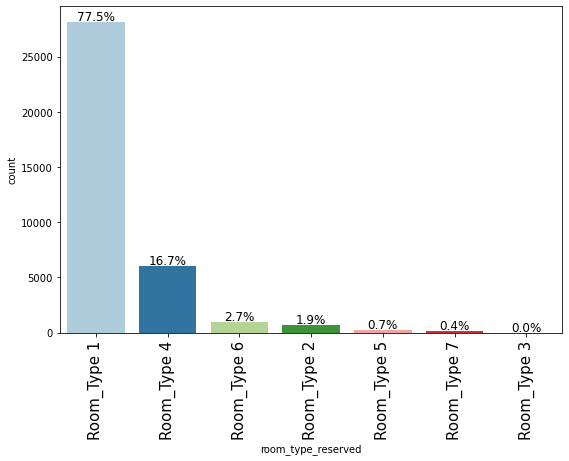

In [1189]:
labeled_barplot(df1, "room_type_reserved", perc=True)

* Room type 1 is the most prefered room type.

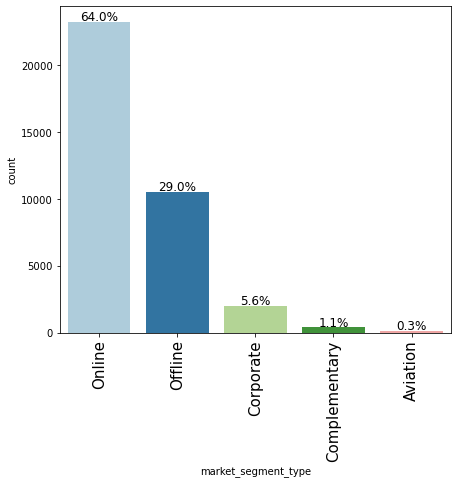

In [1190]:
labeled_barplot(df1, "market_segment_type", perc=True)

* Online market segment type is highly popular as compared to others

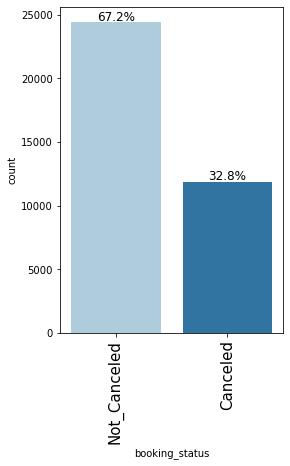

In [1191]:
labeled_barplot(df1, "booking_status", perc=True)

* Majority of the bookings are not cancelled (70%) while few are cancelled.

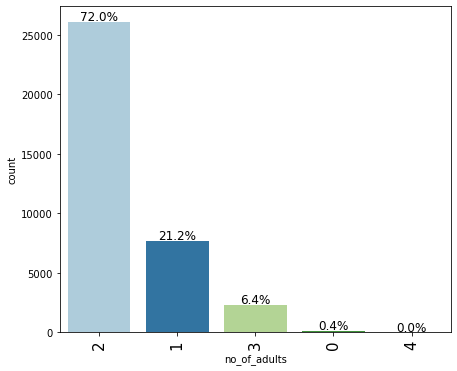

In [1192]:
labeled_barplot(df1, "no_of_adults", perc=True)

* Approx 72% of the times the hotel bookings were done for 2 adults together

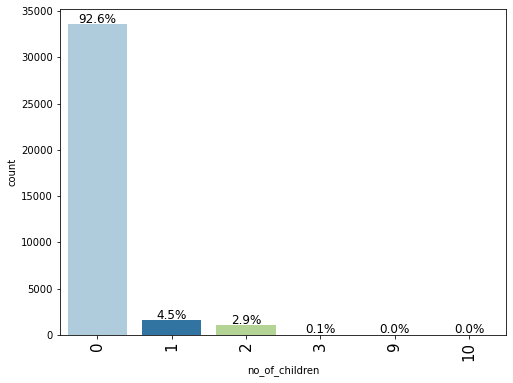

In [1193]:
labeled_barplot(df1, "no_of_children", perc=True)  

* In rare situations, the hotel rooms are booked only for the children

In [1194]:
# replacing 9, and 10 children with 3
df1["no_of_children"] = df1["no_of_children"].replace([9, 10], 3)

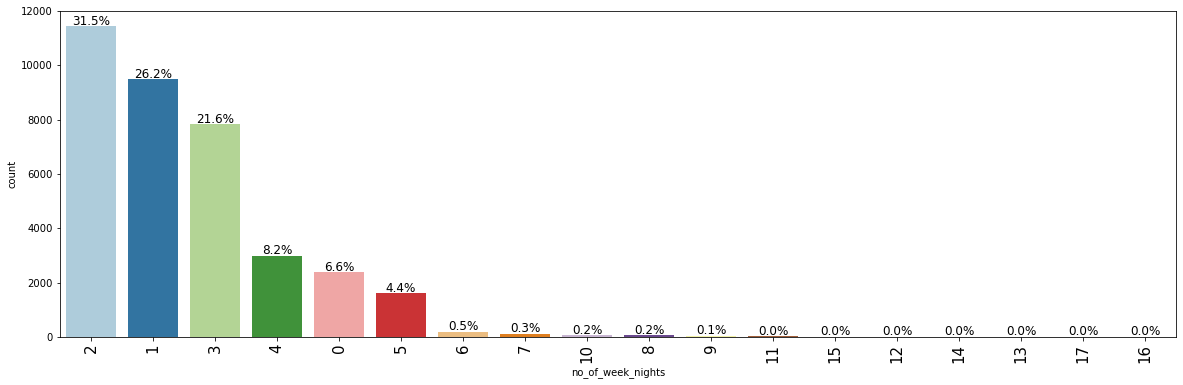

In [1195]:
labeled_barplot(df1, "no_of_week_nights", perc=True)

* In majority of the situations, the number of week nights for which the hotel was booked is 2

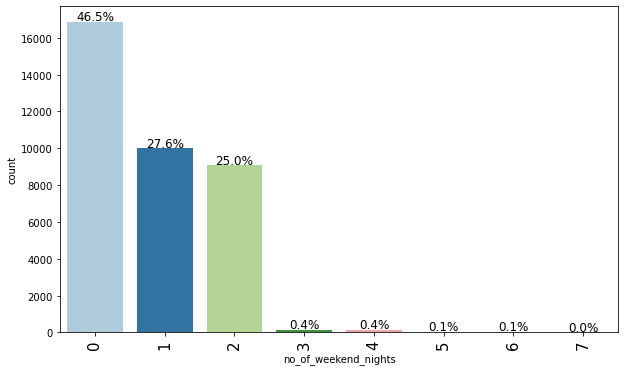

In [1196]:
labeled_barplot(df1, "no_of_weekend_nights", perc=True) 

* For more than 50% of the times, the hotel bookings were done on weekend nights

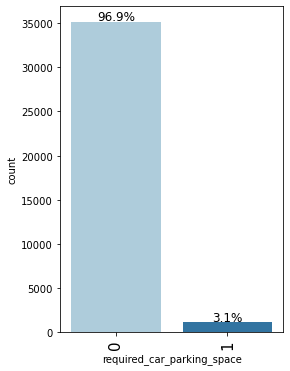

In [1197]:
labeled_barplot(df1, "required_car_parking_space", perc=True)  

* For 97% percent of the times, the hotel customers dont need car parking space

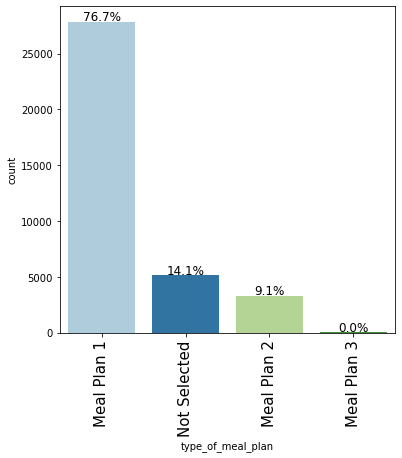

In [1198]:
labeled_barplot(df1, "type_of_meal_plan", perc=True)

* Meal Type 1 is most prefered by the hotel customers

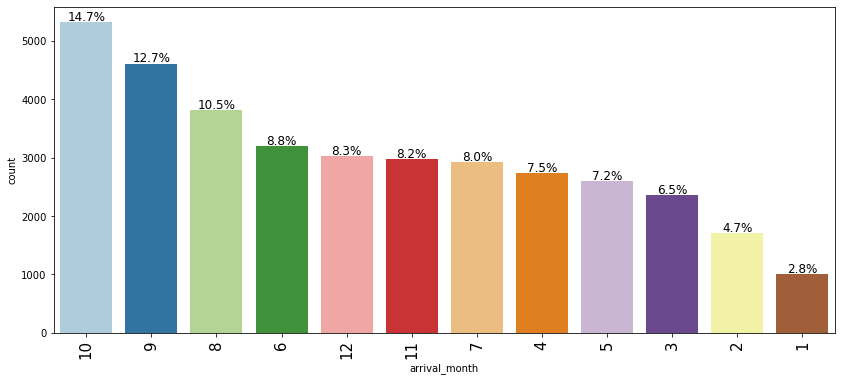

In [1199]:
labeled_barplot(df1, "arrival_month", perc=True)

* The peak season for the hotel business is in the month of October

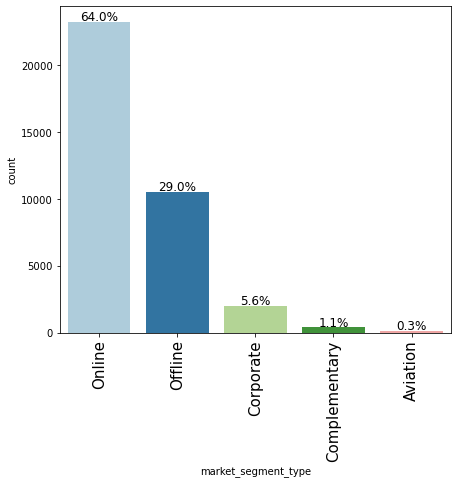

In [1200]:
labeled_barplot(df1, "market_segment_type", perc=True)

* 64% of the hotel bookings are recieved through Online market segment

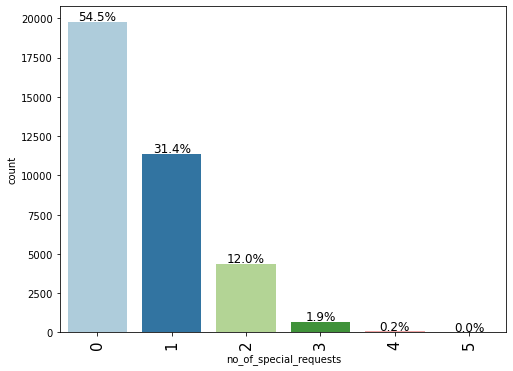

In [1201]:
labeled_barplot(df1, "no_of_special_requests", perc=True)

* More than half of the hotel customers do not demand for any special request.

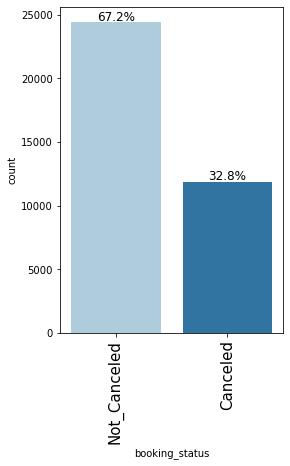

In [1202]:
labeled_barplot(df1, "booking_status", perc=True)

* 67.2% of the times the hotel bookings are not cancelled by the customer and 32.8% of the times the hotel bookings are cancelled by the customer.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


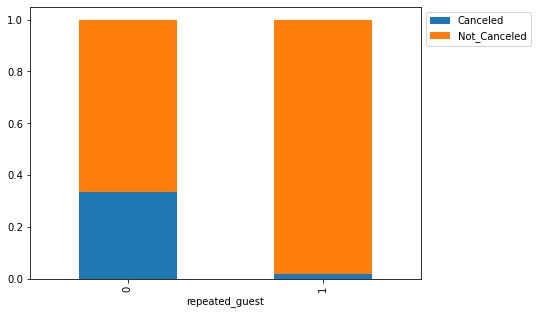

In [1203]:
stacked_barplot(df1, "repeated_guest", "booking_status")

* Irrespective of the customer being a repeated guest or not, the majority of the bookings are not cancelled
* Less than 2% of repeating guests cancels hotel booking.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

* We can drop Booking ID as most of the observations are unique in these variable.
* There are many outliers in the data which we will treat (perform capping of outliers)
  * All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [1204]:
df1.drop(["Booking_ID"], axis=1, inplace=True)
df1.drop(["repeated_guest"], axis=1, inplace=True)



In [1205]:
df1["dateInt"] = (
    df1["arrival_year"].astype(str)
    + "-"
    + df1["arrival_month"].astype(str).str.zfill(2)
    + "-"
    + df1["arrival_date"].astype(str).str.zfill(2)
)

# Convert the DateInt Colum to a datetime dtype
df1 = df1[df1["dateInt"] != "2018-02-29"]
df1["Date"] = pd.to_datetime(df1["dateInt"], format="%Y-%m-%d")
df1 = df1.drop("dateInt", axis=1)

#Convert Date to day of week
df1["DayofWeek"] = df1["Date"].dt.day_name().astype("category")
df1 = df1.drop("arrival_date", axis=1)
df1 = df1.drop("Date", axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  object  
 5   required_car_parking_space            36238 non-null  int64   
 6   room_type_reserved                    36238 non-null  object  
 7   lead_time                             36238 non-null  int64   
 8   arrival_year                          36238 non-null  int64   
 9   arrival_month                         36238 non-null  int64   
 10  market_segment_type                   36238 non-null  object  
 11  no

In [1206]:
df1.shape

(36238, 17)

* There are 36238 rows and 17 columns in the new dataframe

In [1207]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  object  
 5   required_car_parking_space            36238 non-null  int64   
 6   room_type_reserved                    36238 non-null  object  
 7   lead_time                             36238 non-null  int64   
 8   arrival_year                          36238 non-null  int64   
 9   arrival_month                         36238 non-null  int64   
 10  market_segment_type                   36238 non-null  object  
 11  no

### Outlier Detection

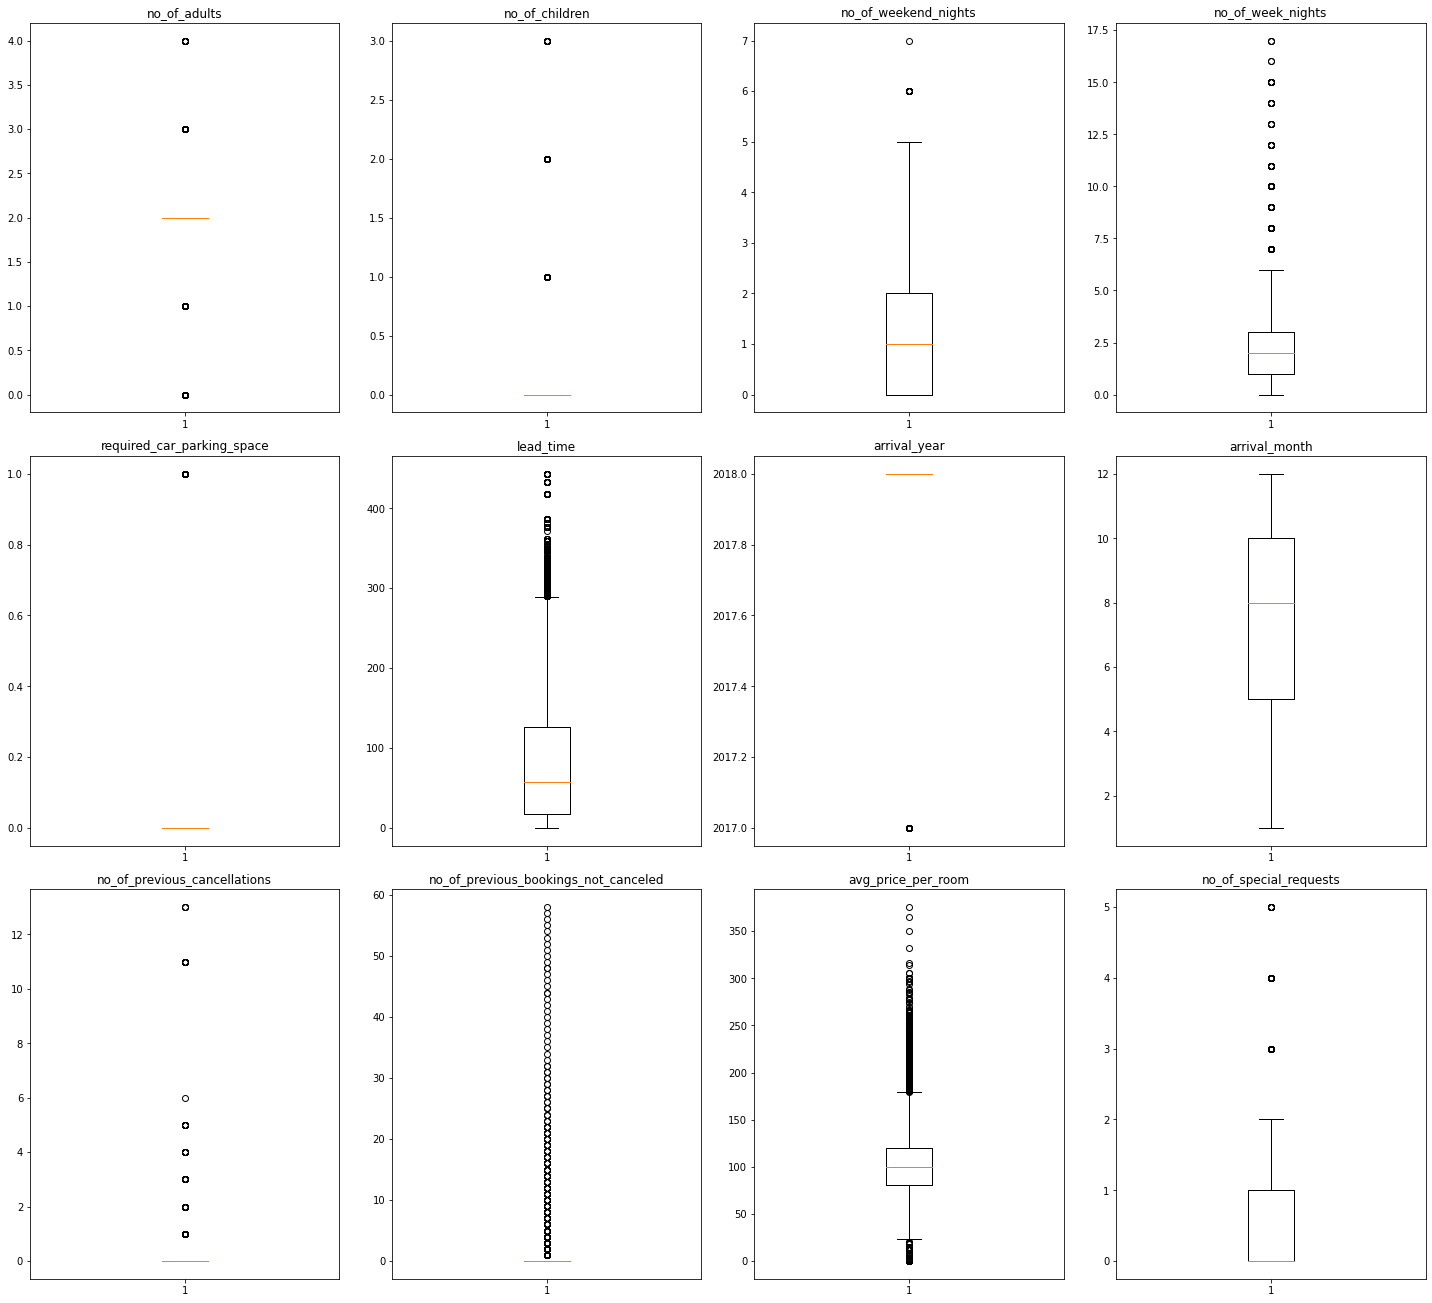

In [1208]:
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Number of weekend nights, number of week nights, lead time, average price per room and number of special requests have upper outliers. 
* Although there are outliers, these are proper values and hence we will not treat the outliers

### Data Preparation for Modeling

**Encoding Not_Canceled as 0 and Canceled as 1 as we want to focus on the factors affecting booking_cancellations**

In [1209]:
df1["booking_status"] = df1["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**Creating training and test sets.**

In [1210]:
# specifying the independent  and dependent variables
X = df1.drop(["booking_status"], axis=1)
y = df1["booking_status"]

print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month market_segment_type  \
0 

In [1211]:
# adding a constant to the independent variables
X = sm.add_constant(X) #,has_constant='add')
X


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,DayofWeek
0,1.0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,Offline,0,0,65.00,0,Monday
1,1.0,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,Online,0,0,106.68,1,Tuesday
2,1.0,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,Online,0,0,60.00,0,Wednesday
3,1.0,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,Online,0,0,100.00,0,Sunday
4,1.0,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,Online,0,0,94.50,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,Online,0,0,167.80,1,Friday
36271,1.0,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,Online,0,0,90.95,2,Wednesday
36272,1.0,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,Online,0,0,98.39,2,Sunday
36273,1.0,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,Online,0,0,94.50,0,Saturday


# Creating dummy variables
#X = pd.get_dummies(X, drop_first=True)
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [1212]:
X_train

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
4124,1.0,2,0,0,1,0,289,2017,10,0,0,67.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
31349,1.0,3,0,0,4,0,107,2018,8,0,0,152.10,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10601,1.0,2,0,0,1,0,4,2018,2,0,0,90.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
26095,1.0,2,0,0,4,0,52,2018,3,0,0,63.75,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9017,1.0,2,0,1,2,0,142,2018,5,0,0,125.33,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,1.0,2,0,0,1,0,57,2018,12,0,0,79.20,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
32546,1.0,2,0,1,2,0,226,2018,12,0,0,105.00,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
5194,1.0,2,0,0,2,0,62,2018,8,0,0,135.90,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12187,1.0,2,0,0,2,0,0,2017,8,0,0,109.00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [1213]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25366, 32)
Shape of test set :  (10872, 32)
Percentage of classes in training set:
0    0.67074
1    0.32926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.675681
1    0.324319
Name: booking_status, dtype: float64


### Bivariate analysis

#### Correlation Check

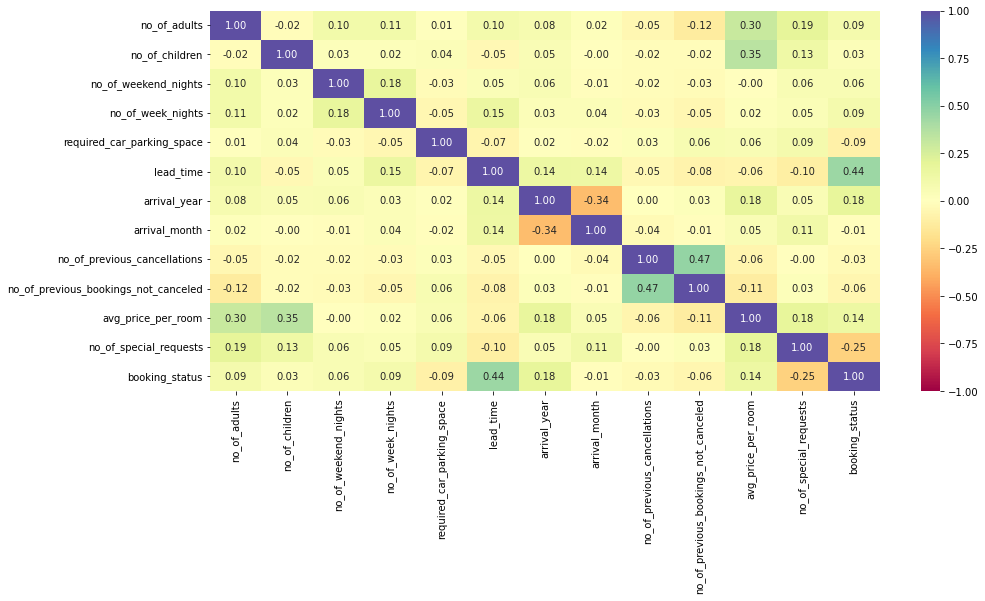

In [1214]:
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Number of previous bookings not cancelled are moderately correlated with no of previous cancellations
* Average price per room is weakly correlated with number of children
* Lead time for booking is moderately correlated with booking status.

In [1215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  object  
 5   required_car_parking_space            36238 non-null  int64   
 6   room_type_reserved                    36238 non-null  object  
 7   lead_time                             36238 non-null  int64   
 8   arrival_year                          36238 non-null  int64   
 9   arrival_month                         36238 non-null  int64   
 10  market_segment_type                   36238 non-null  object  
 11  no

booking_status         0      1    All
type_of_meal_plan                     
All                24360  11878  36238
Meal Plan 1        19129   8673  27802
Not Selected        3431   1698   5129
Meal Plan 2         1796   1506   3302
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


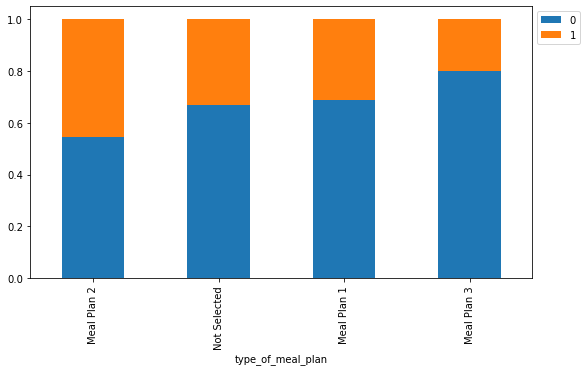

In [1216]:
stacked_barplot(df1, "type_of_meal_plan", "booking_status")

* Meal plan 1 is highly popular among all meal plans. 
* Distribution of non - cancelled bookings in meal plan 3 is higher than meal plan 2 and meal plan 1
* Distribution of Cancelled bookings in meal plan 2 is higher than meal plan 2 and meal plan 1

booking_status          0      1    All
room_type_reserved                     
All                 24360  11878  36238
Room_Type 1         19039   9066  28105
Room_Type 4          3981   2068   6049
Room_Type 6           558    406    964
Room_Type 2           464    228    692
Room_Type 5           191     72    263
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


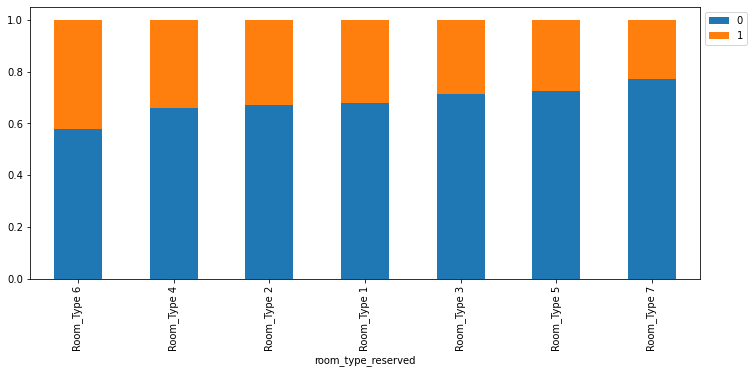

In [1217]:
stacked_barplot(df1, "room_type_reserved", "booking_status")

* Room Type 1 is highly popular as compare to other room types. 
* Distribution of non - cancelled bookings in Room type 7 is higher than other room types
* Distribution of Cancelled bookings in Room type 6 is higher than other room types

booking_status           0      1    All
market_segment_type                     
All                  24360  11878  36238
Online               14725   8469  23194
Offline               7366   3152  10518
Corporate             1791    220   2011
Aviation                88     37    125
Complementary          390      0    390
------------------------------------------------------------------------------------------------------------------------


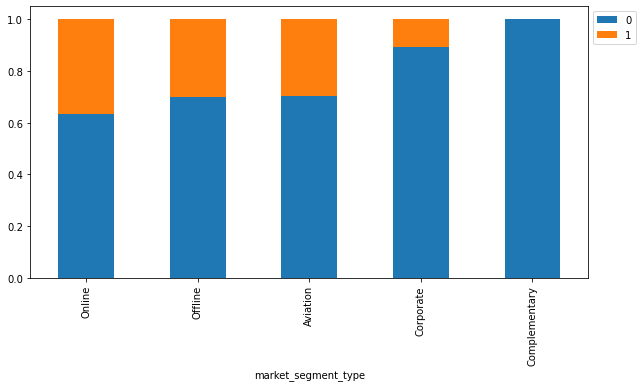

In [1218]:
stacked_barplot(df1, "market_segment_type", "booking_status")

* Online Market segment type is widely used as compare to other market segment type. 
* Distribution of non - cancelled bookings in Complementary market segment is higher than other market segments
* Distribution of Cancelled bookings in online market segment is higher than other market segment category

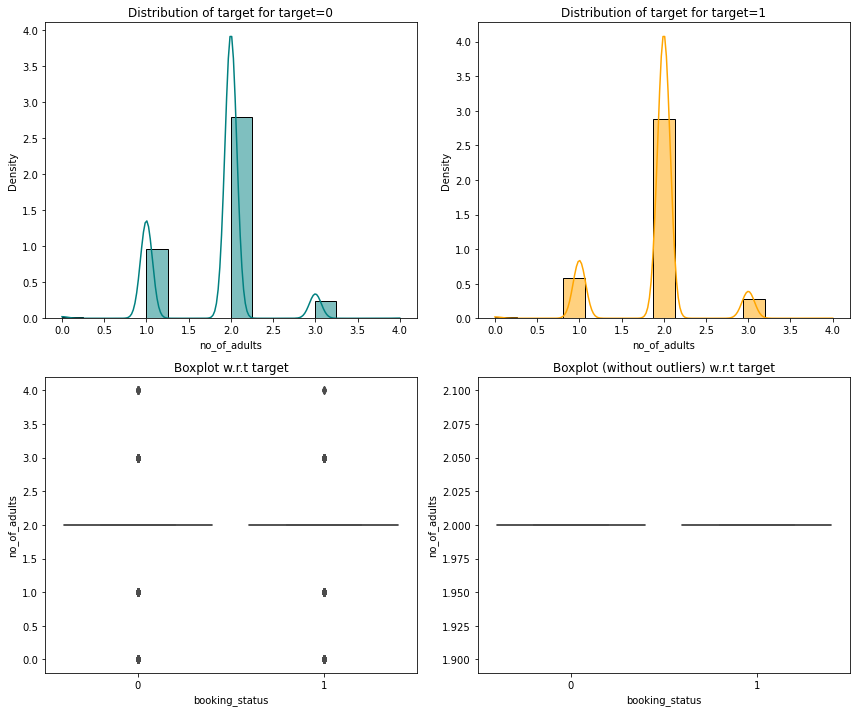

In [1219]:
distribution_plot_wrt_target(df1, "no_of_adults", "booking_status")

* The distribution of 2 number of adults coming to the hotel as customers is higher than other counts both for cancelled and non-cancelled bookings

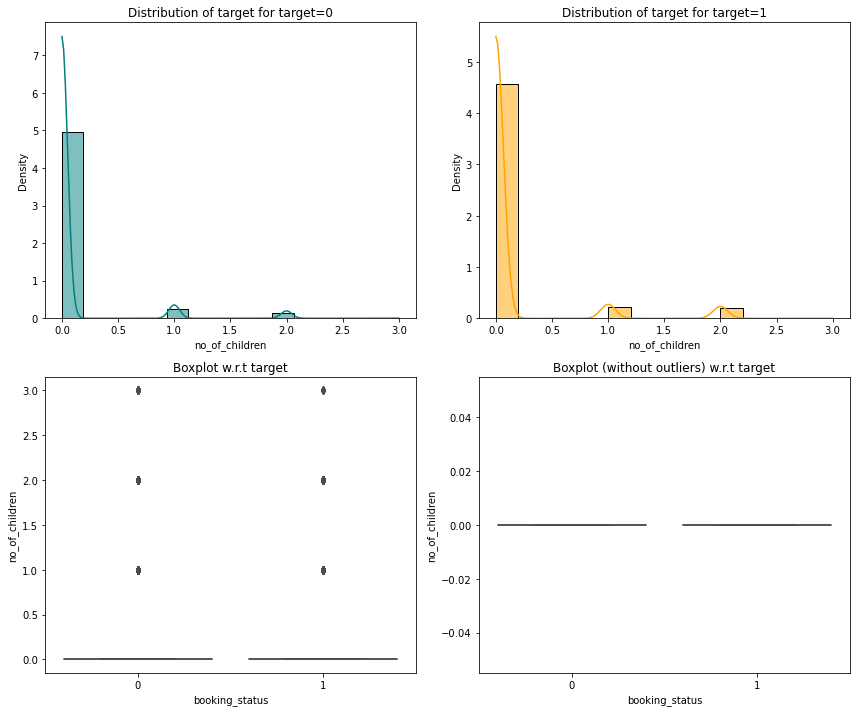

In [1220]:
distribution_plot_wrt_target(df1, "no_of_children", "booking_status")

* The distribution of 0 number of Children coming to the hotel as customers is higher than non zero number of childrens  both for cancelled and non-cancelled bookings

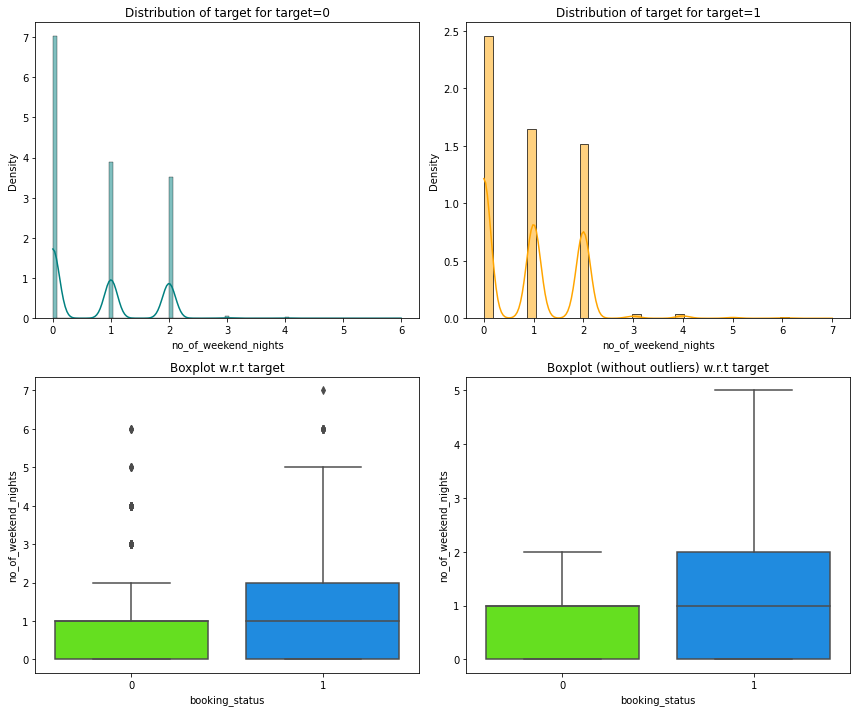

In [1221]:
distribution_plot_wrt_target(df1, "no_of_weekend_nights", "booking_status")

* The distribution of 2 number of weekend nights is higher than other counts  both for cancelled and non-cancelled bookings

In [1222]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  object  
 5   required_car_parking_space            36238 non-null  int64   
 6   room_type_reserved                    36238 non-null  object  
 7   lead_time                             36238 non-null  int64   
 8   arrival_year                          36238 non-null  int64   
 9   arrival_month                         36238 non-null  int64   
 10  market_segment_type                   36238 non-null  object  
 11  no

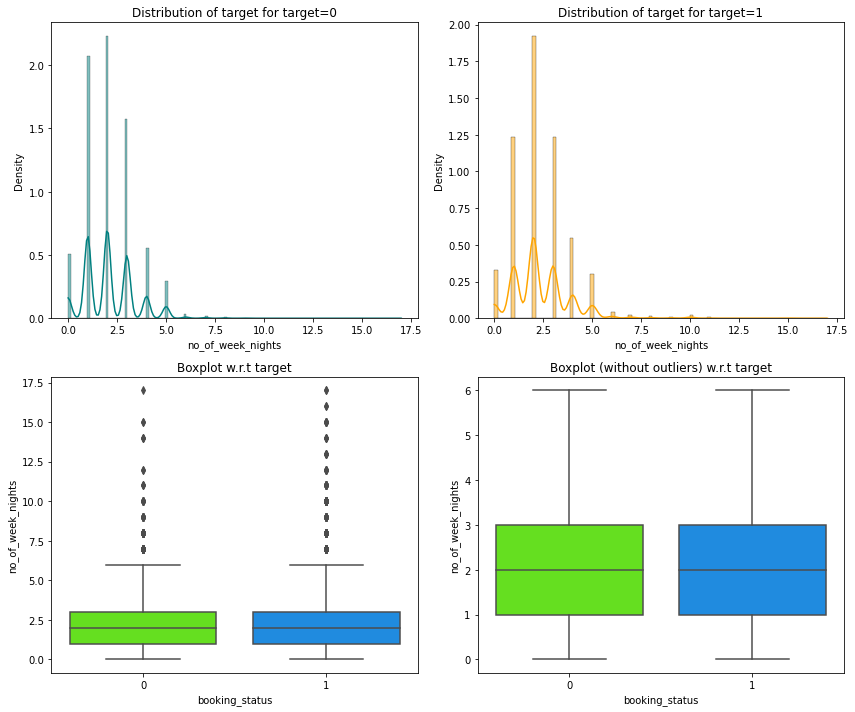

In [1223]:
distribution_plot_wrt_target(df1, "no_of_week_nights", "booking_status")

* The distribution of 2 number of week nights is higher than other counts  both for cancelled and non-cancelled bookings

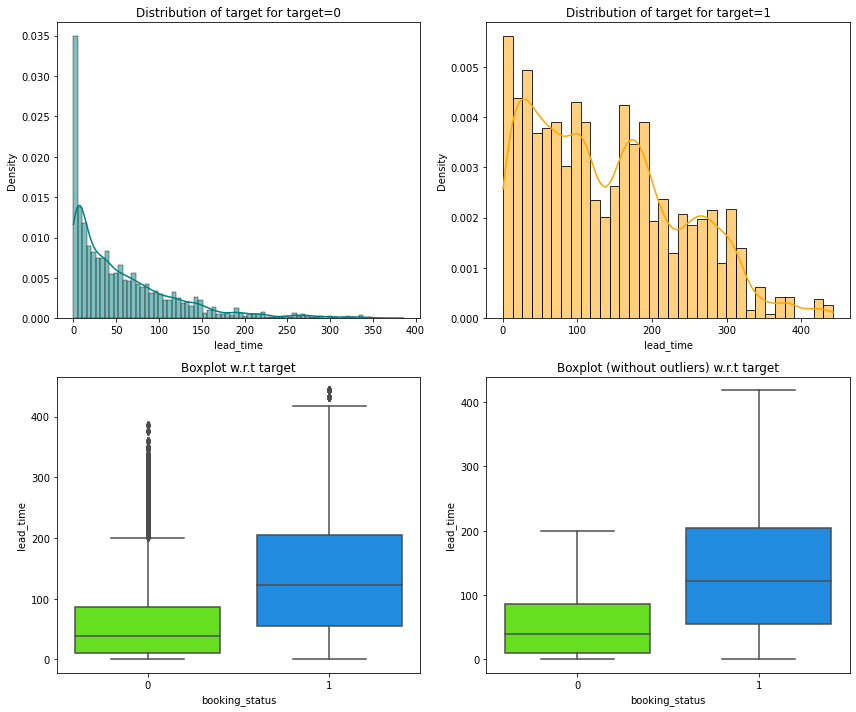

In [1224]:
distribution_plot_wrt_target(df1, "lead_time", "booking_status")

* The distribution of lead time for both canceled and non-canceled bookings is right skewed

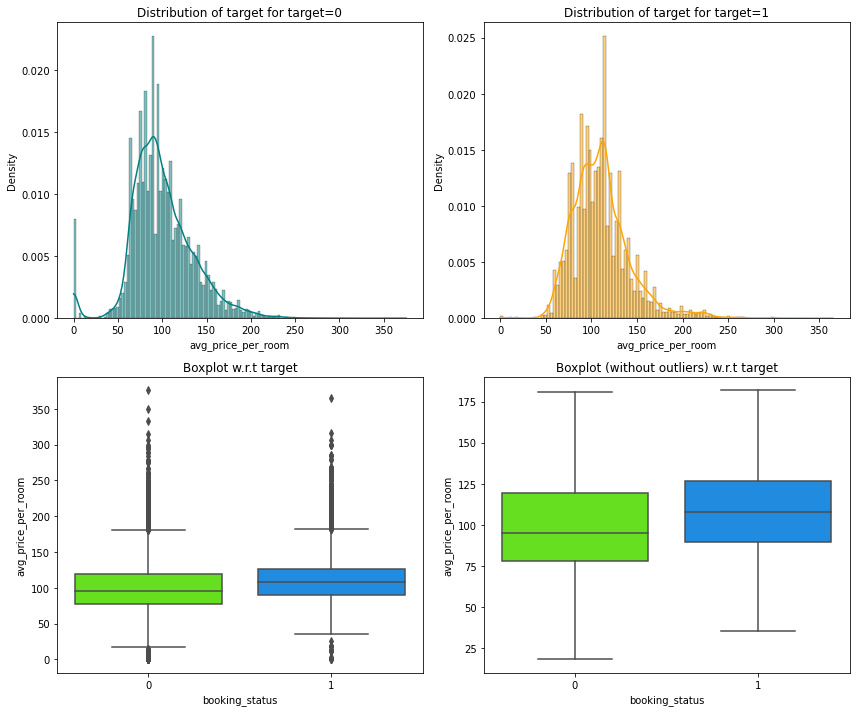

In [1225]:
distribution_plot_wrt_target(df1, "avg_price_per_room", "booking_status")

* The distribution of average price per room for the Cancelled and Non-Cancelled booking status is approximately Normal.

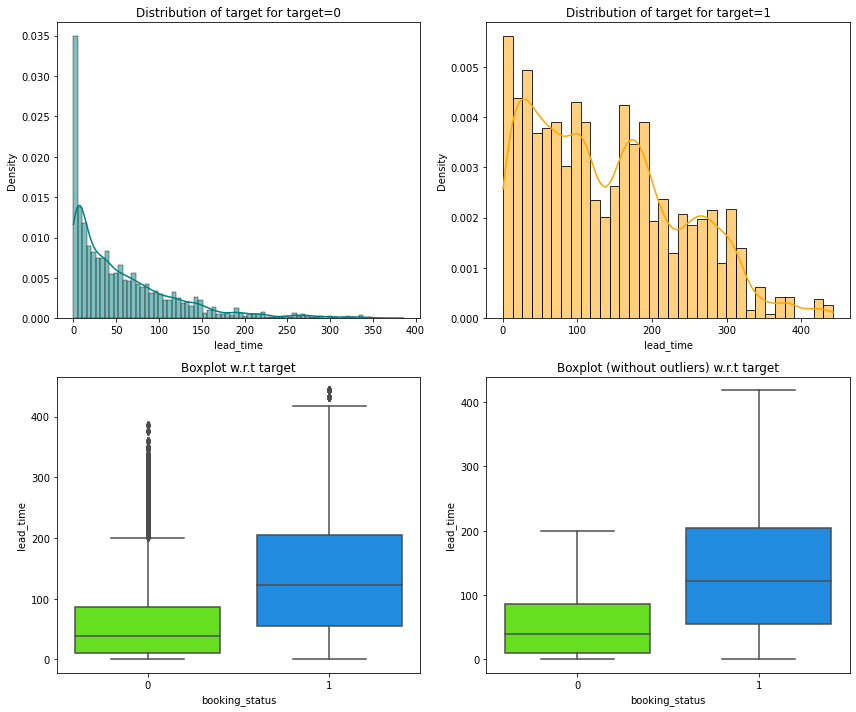

In [1226]:
distribution_plot_wrt_target(df1, "lead_time", "booking_status") 

* The distribution of lead time both for the canceled and Non-cancelled bookings is highly right skewed

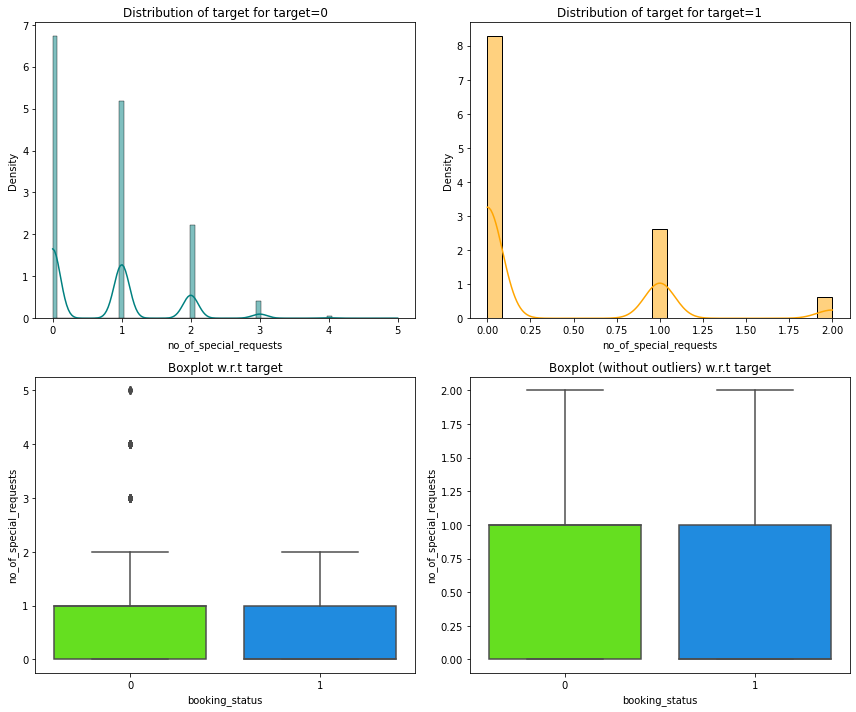

In [1227]:
distribution_plot_wrt_target(df1, "no_of_special_requests", "booking_status")

* The average number of special requests both for the Canceled and non-Canceled booking are equal to 0.5

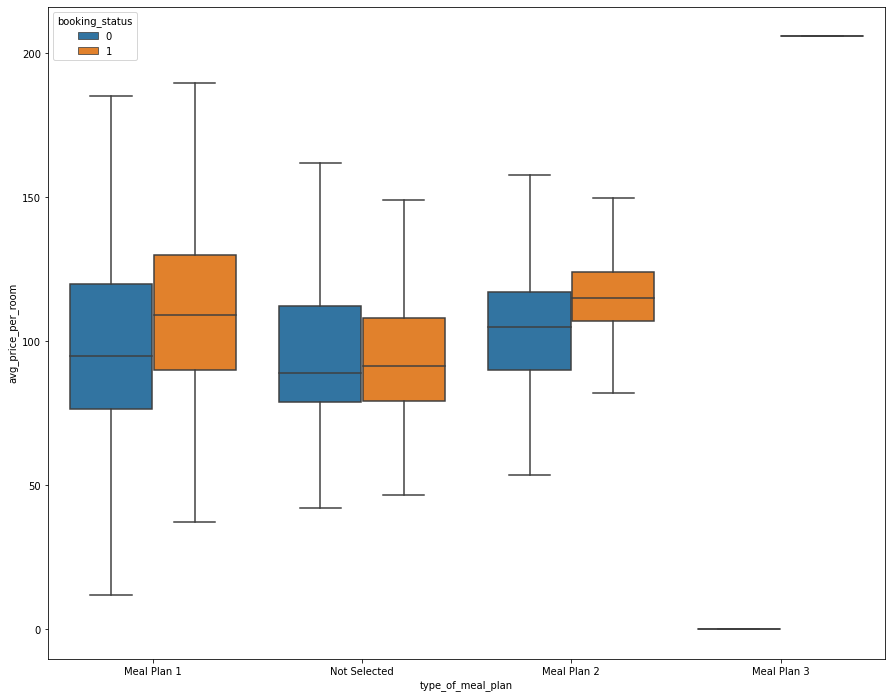

In [1228]:
# lets see how avg_price_per_room vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="avg_price_per_room", x="type_of_meal_plan", data=df1, hue="booking_status", showfliers=False
)
plt.show()

* The average price per room for the Cancelled bookings is higher than Non-Canceled for all meal types.

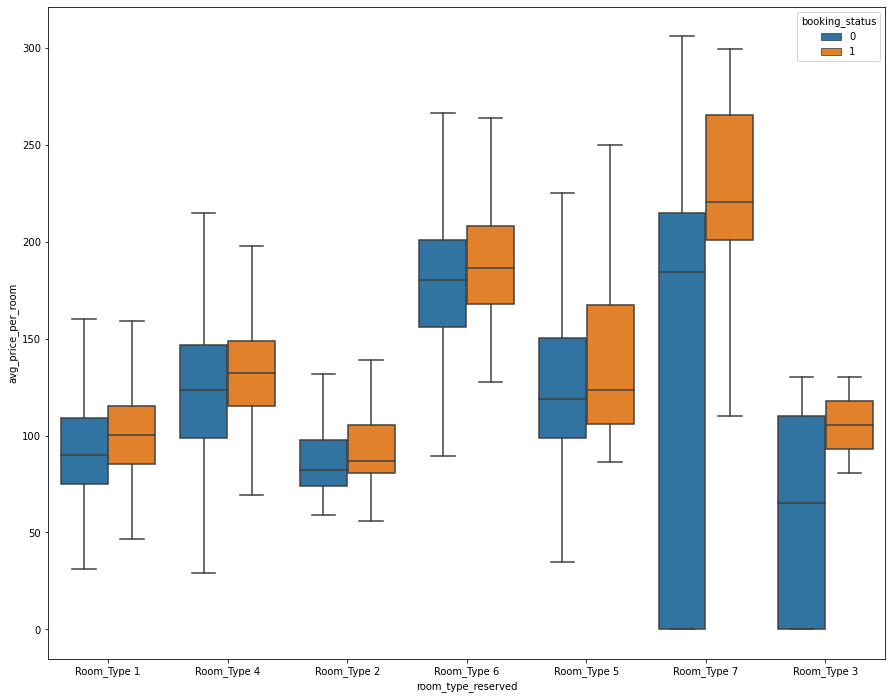

In [1229]:
# lets see how avg_price_per_room vary across different room_type_reserved
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="avg_price_per_room", x="room_type_reserved", data=df1, hue="booking_status", showfliers=False
)
plt.show()

* The average price per room for the Cancelled bookings is higher than Non-Canceled bookings for all Room-Types.

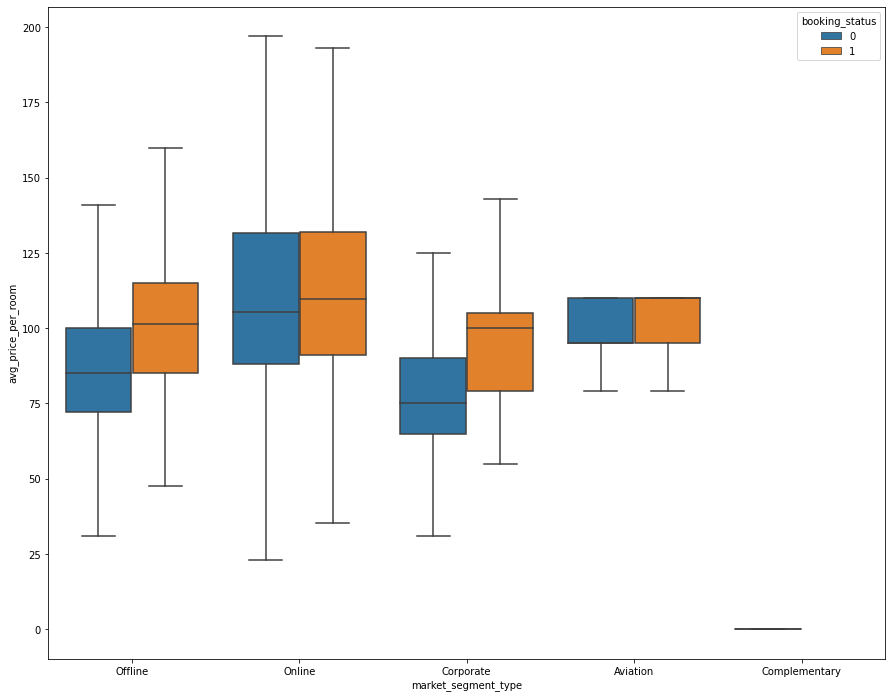

In [1230]:
# lets see how avg_price_per_room vary across different room_type_reserved
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="avg_price_per_room", x="market_segment_type", data=df1, hue="booking_status", showfliers=False
)
plt.show()

* The average price per room for the Cancelled bookings is higher than Non-Canceled for all market segment types

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

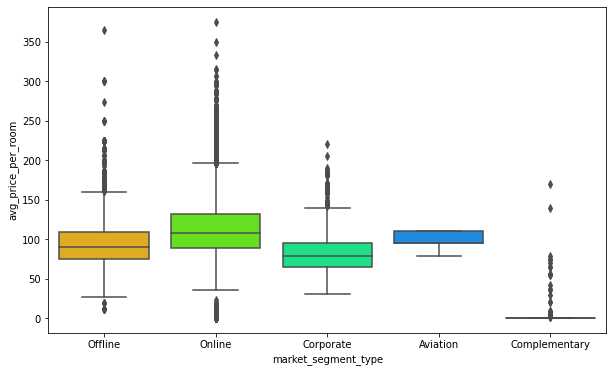

In [1231]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* The average price per room is highest for the Online market segment. 

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24360  11878  36238
Online               14725   8469  23194
Offline               7366   3152  10518
Corporate             1791    220   2011
Aviation                88     37    125
Complementary          390      0    390
------------------------------------------------------------------------------------------------------------------------


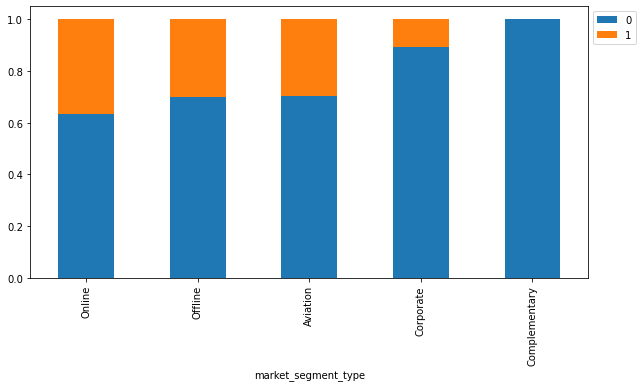

In [1232]:
stacked_barplot(df1, "market_segment_type", "booking_status")

* The proportion of Non-Cancelled bookings is higher than the Cancelled bookings for all market segment type 

booking_status              0      1    All
no_of_special_requests                     
All                     24360  11878  36238
0                       11211   8540  19751
1                        8662   2701  11363
2                        3726    637   4363
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


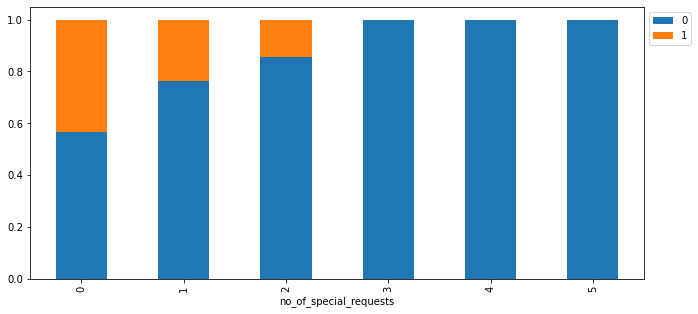

In [1233]:
stacked_barplot(df1, "no_of_special_requests","booking_status") 

* As number of special requests increase the booking cancellations decreases. Cancellations are high when there is no special request while there are no cancellations when number of special request is greater than 2.
* The proportion of special requests is higher for the Non-Canceled bookings.

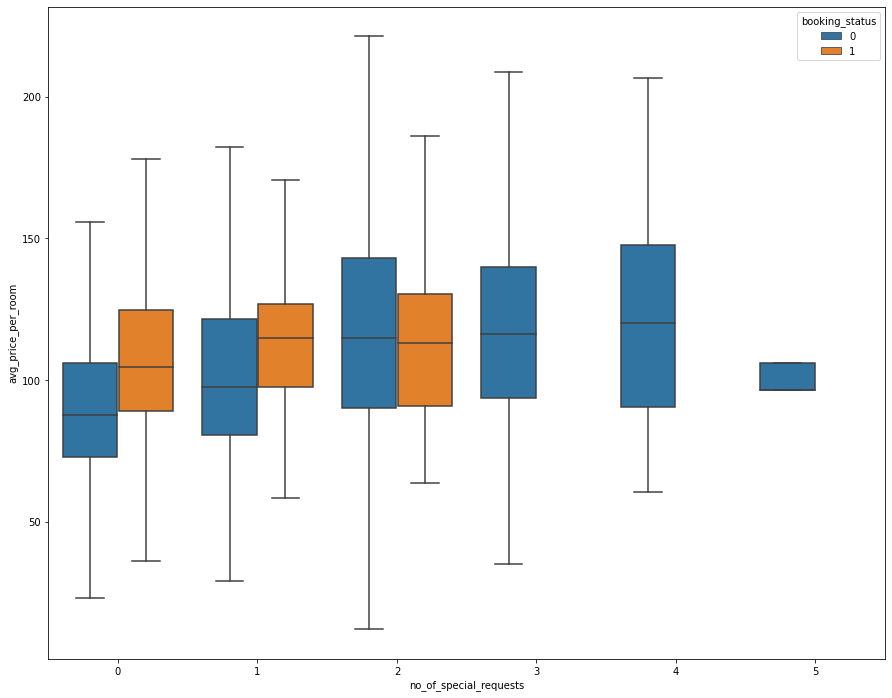

In [1234]:
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="avg_price_per_room", x="no_of_special_requests", data=df1, hue="booking_status", showfliers=False
)
plt.show()

* The average price per room for the Canceled bookings is higher for 50 % of the special requests.

In [1235]:
family_data = df1[(df1["no_of_children"] >= 0) & (df1["no_of_adults"] > 1)]
family_data.shape

(28423, 17)

In [1236]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18443  9980  28423
2                     15496  8210  23706
3                      2424  1366   3790
4                       512   398    910
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


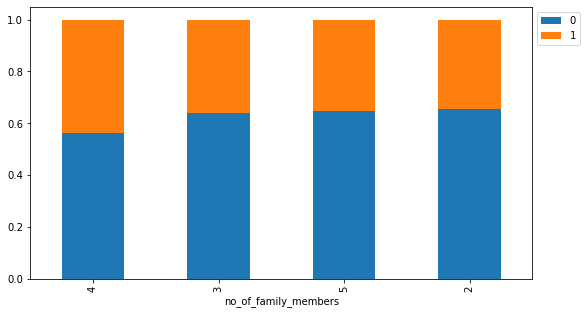

In [1237]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* The proportion of not cancelled bookings among 2,3 and 5 number of family members is approximately same.
* Hotels are mostly visited by families of 2 people

In [1238]:
stay_data = df1[(df1["no_of_week_nights"] > 0) | (df1["no_of_weekend_nights"] > 0)]
stay_data.shape

(36160, 17)

In [1239]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0      1    All
total_days                         
All             24284  11876  36160
3                6456   3585  10041
2                5566   2899   8465
4                3945   1938   5883
1                5135   1465   6600
5                1765    823   2588
6                 565    463   1028
7                 590    383    973
8                 100     79    179
10                 50     58    108
9                  58     53    111
14                  5     27     32
15                  5     26     31
13                  3     15     18
12                  9     15     24
11                 24     15     39
20                  3      8     11
19                  1      5      6
16                  1      5      6
17                  1      4      5
18                  0      3      3
21                  1      3      4
22                  0      2      2
23                  1      1      2
24                  0      1      1
----------------------------

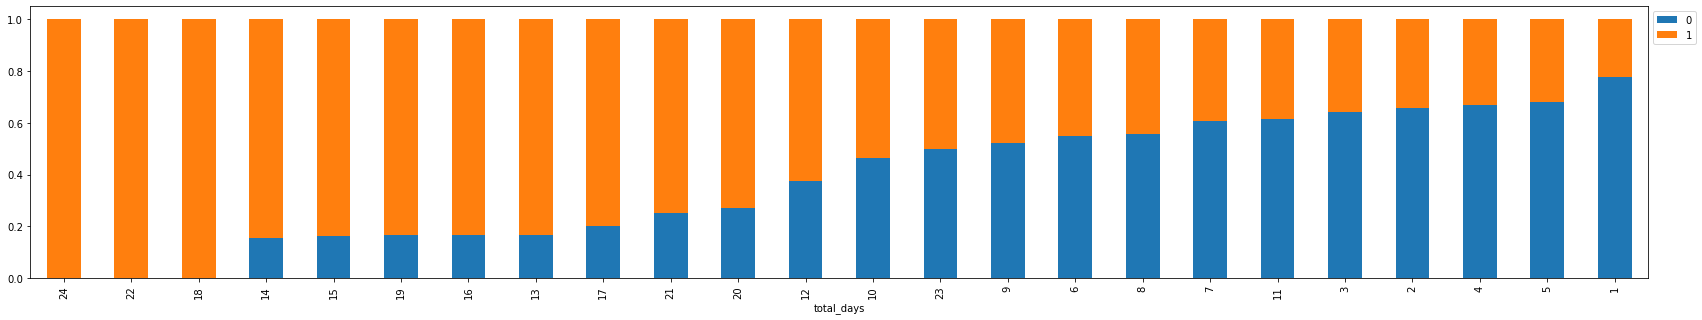

In [1240]:
stacked_barplot(stay_data, "total_days", "booking_status")

* The proportion of cancelled bookings is less for 1 day of stay data and highest in greater than 14 days of stay data
* The proportion of non-cancelled bookings is less for 14 days of stay data and highest in 1 day of stay data

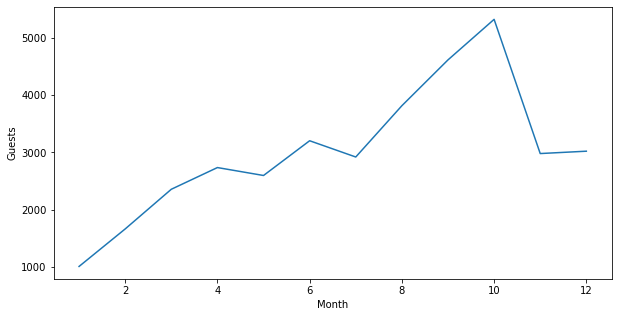

In [1241]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df1.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The number of bookings is at its peak in october month while it is minimum in January.

booking_status      0      1    All
arrival_month                      
All             24360  11878  36238
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1244    423   1667
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


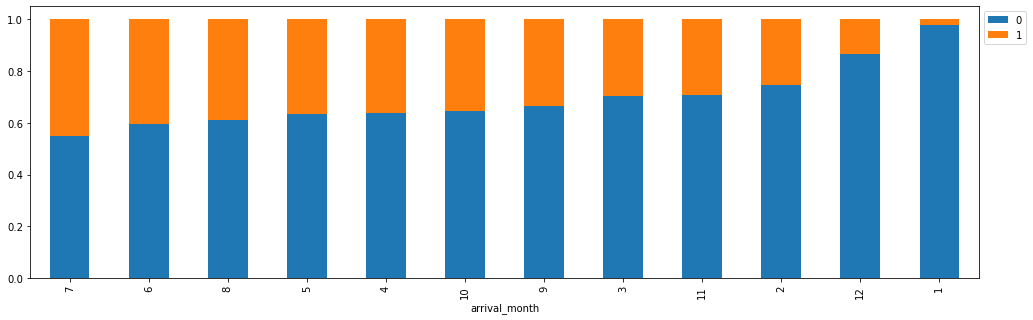

In [1242]:
stacked_barplot(df1, "arrival_month", "booking_status")

* The Distribution of all cancelled bookings is lower than non-cancelled bookings for all arrival months.

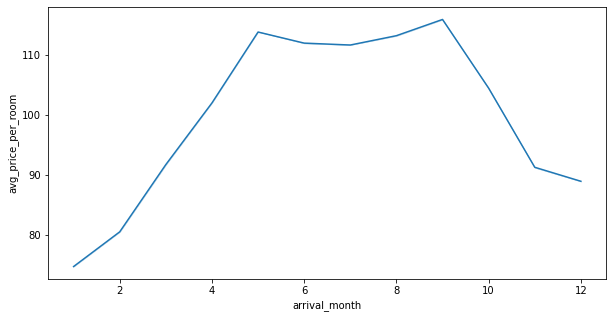

In [1243]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df1,  x="arrival_month",y="avg_price_per_room",ci=False)
plt.show()

* The average price per room is highest for the month of September and is lowest for the month of January.

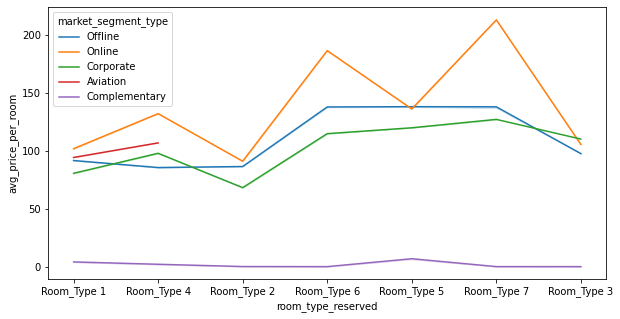

In [1244]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df1,  x="room_type_reserved",y="avg_price_per_room",hue='market_segment_type',ci=False)
plt.show()

* The average price per room is mostly higher in online market segment type while it is lowest in Complementary market segment

## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [1245]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25334
Method:                           MLE   Df Model:                           31
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.3327
Time:                        23:44:01   Log-Likelihood:                -10725.
converged:                      False   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -800.5067    122.540     -6.533      0.000   -1040.680    -560.333
no_of_adults                             0.0802      

**Observations**

- Negative values of the coefficient show that the probability of hotel booking cancellation decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of hotel booking cancellation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a customer has cancelled the hotel booking  but in reality the customer has not cancelled the booking.

2. Predicting a customer has not cancelled the booking  but in reality the customer has cancelled.

**Which case is more important?** 

* Both the cases are important as:

  * If we predict a customer has cancelled the booking but actually the booking has not been cancelled then it will be very difficult and expensive to make arrangements for the customer at the last minute.

  * If we predict a customer has booked a Hotel  but actually the booking has been cancelled then there will be extreme loss of time and resources for the hotel management.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [1246]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [1247]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

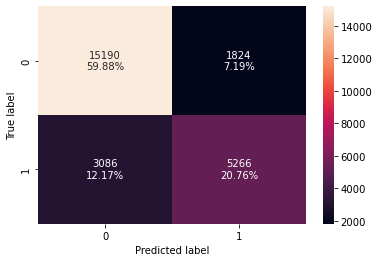

In [1248]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [1249]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806434,0.630508,0.742736,0.682036


**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [1250]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   4.021556e+07
no_of_adults                            1.342031e+00
no_of_children                          2.090453e+00
no_of_weekend_nights                    1.968901e+00
no_of_week_nights                       1.450583e+00
required_car_parking_space              1.028997e+00
lead_time                               1.395158e+00
arrival_year                            1.454856e+00
arrival_month                           1.270490e+00
no_of_previous_cancellations            1.213293e+00
no_of_previous_bookings_not_canceled    1.344850e+00
avg_price_per_room                      2.033044e+00
no_of_special_requests                  1.249922e+00
type_of_meal_plan_Meal Plan 2           1.285612e+00
type_of_meal_plan_Meal Plan 3           1.028085e+00
type_of_meal_plan_Not Selected          1.272864e+00
room_type_reserved_Room_Type 2          1.097011e+00
room_type_reserved_Room_Type 3          1.002984e+00
room_type_r

In [1251]:
round((vif_series),2)

const                                   40215557.65
no_of_adults                                   1.34
no_of_children                                 2.09
no_of_weekend_nights                           1.97
no_of_week_nights                              1.45
required_car_parking_space                     1.03
lead_time                                      1.40
arrival_year                                   1.45
arrival_month                                  1.27
no_of_previous_cancellations                   1.21
no_of_previous_bookings_not_canceled           1.34
avg_price_per_room                             2.03
no_of_special_requests                         1.25
type_of_meal_plan_Meal Plan 2                  1.29
type_of_meal_plan_Meal Plan 3                  1.03
type_of_meal_plan_Not Selected                 1.27
room_type_reserved_Room_Type 2                 1.10
room_type_reserved_Room_Type 3                 1.00
room_type_reserved_Room_Type 4                 1.35
room_type_re

* `market_segment_type_Online`, `market_segment_type_Offline`, and some categorical levels of `market_segment_type_Corporate` exhibit high multicollinearity

* We see that some variables have high values for VIF


* We will drop `market_segment_type_Online` as it has high vif values

Removing market_segment_type_Online

In [1252]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   4.014236e+07
no_of_adults                            1.323149e+00
no_of_children                          2.089374e+00
no_of_weekend_nights                    1.967854e+00
no_of_week_nights                       1.449464e+00
required_car_parking_space              1.028860e+00
lead_time                               1.390198e+00
arrival_year                            1.452515e+00
arrival_month                           1.269619e+00
no_of_previous_cancellations            1.213268e+00
no_of_previous_bookings_not_canceled    1.344845e+00
avg_price_per_room                      2.032125e+00
no_of_special_requests                  1.245054e+00
type_of_meal_plan_Meal Plan 2           1.285068e+00
type_of_meal_plan_Meal Plan 3           1.028085e+00
type_of_meal_plan_Not Selected          1.270907e+00
room_type_reserved_Room_Type 2          1.096794e+00
room_type_reserved_Room_Type 3          1.002984e+00
room_type_r

In [1253]:
round((vif_series2),2)

const                                   40142362.67
no_of_adults                                   1.32
no_of_children                                 2.09
no_of_weekend_nights                           1.97
no_of_week_nights                              1.45
required_car_parking_space                     1.03
lead_time                                      1.39
arrival_year                                   1.45
arrival_month                                  1.27
no_of_previous_cancellations                   1.21
no_of_previous_bookings_not_canceled           1.34
avg_price_per_room                             2.03
no_of_special_requests                         1.25
type_of_meal_plan_Meal Plan 2                  1.29
type_of_meal_plan_Meal Plan 3                  1.03
type_of_meal_plan_Not Selected                 1.27
room_type_reserved_Room_Type 2                 1.10
room_type_reserved_Room_Type 3                 1.00
room_type_reserved_Room_Type 4                 1.34
room_type_re

* Dropping market_segment_type_Online fixes the multicollinearity in all columns.

In [1254]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806276,0.630029,0.742591,0.681695


* No significant change in the model performance.

In [1255]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25335
Method:                           MLE   Df Model:                           30
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.3327
Time:                        23:44:07   Log-Likelihood:                -10726.
converged:                      False   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -805.4050    122.408     -6.580      0.000   -1045.321    -565.489
no_of_adults                             0.0752      

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [1256]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'DayofWeek_Monday', 'DayofWeek_Saturday', 'DayofWeek_Sunday', 'DayofWeek_Tuesday', 'DayofWeek_Wednesday']


In [1257]:
X_train2 = X_train1[selected_features]

In [1258]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25341
Method:                           MLE   Df Model:                           24
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.3318
Time:                        23:44:09   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -786.4431    122.115     -6.440      0.000   -1025.785    -547.101
no_of_adults                             0.0762      

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

### Coefficient Interpretations

* Coefficient of some levels of meal plan , average price per room,  are positive. An increase in these will lead to increase in chances of booking Cancellations

* Coefficient of required_car_parking_space , arrival_month , room_type_reserved are negative. An increase in these will lead to decrease in chances of a customer cancelling the hotel bookings.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [1259]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Tuesday,DayofWeek_Wednesday
Odds,0.0,1.079222,1.252499,1.193427,0.208727,1.016228,1.474634,0.953270,0.676874,1.019332,0.223593,1.208507,1.321009,0.570524,0.793399,0.565829,0.359641,0.250945,0.435251,0.170216,0.835268,0.790742,0.874201,0.860941,0.845105
Change_odd%,-100.0,7.922194,25.249880,19.342749,-79.127267,1.622847,47.463389,-4.672957,-32.312576,1.933216,-77.640686,20.850667,32.100852,-42.947574,-20.660130,-43.417058,-64.035872,-74.905451,-56.474916,-82.978414,-16.473206,-20.925818,-12.579915,-13.905882,-15.489469


**Coefficient interpretations**

* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a customer booking cancellation by ~1.07 times or a ~7.923% increase in odds of customer booking cancellation.
* `lead_time`: Holding all other features constant a 1 unit change in lead time will increase the odds of a customer booking cancellation by ~1.01 times or a ~1.623% increase in odds of customer booking cancellation.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in avg_price_per_room will increase the odds of a customer booking cancellation by ~1.01 times or a ~1.933% increase in odds of customer booking cancellation.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in no_of_special_requests will increase the odds of a customer booking cancellation by ~0.22 times or a ~77.64% decrease in odds of customer booking cancellation.
**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

**Training set performance**

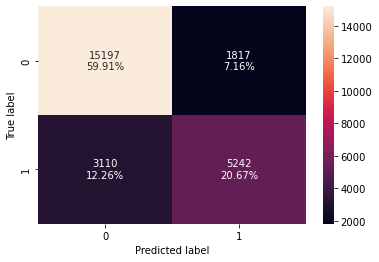

In [1260]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [1261]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805764,0.627634,0.742598,0.680293


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [1262]:
X_test2 = X_test[list(X_train2.columns)]

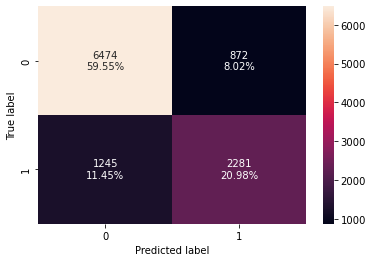

In [1263]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [1264]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80528,0.646909,0.723438,0.683036


- The model is giving a good f1_score of ~0.680 and ~0.683 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

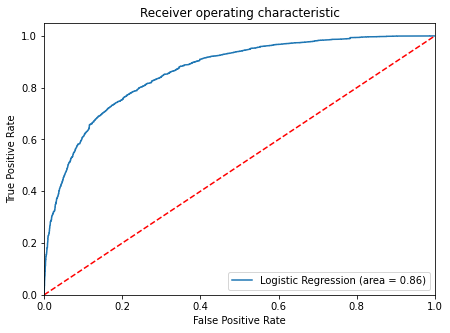

In [1265]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [1266]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3280876568913689


**Checking model performance on training set**

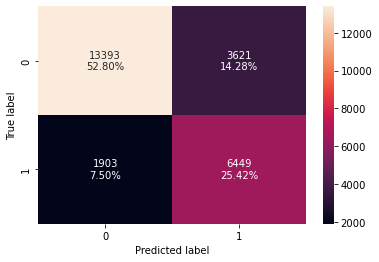

In [1267]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [1268]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.782228,0.77215,0.640417,0.700141


* F1 score and Recall have increased but the other metrics have reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

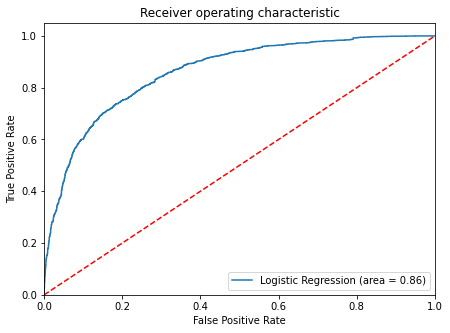

In [1269]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

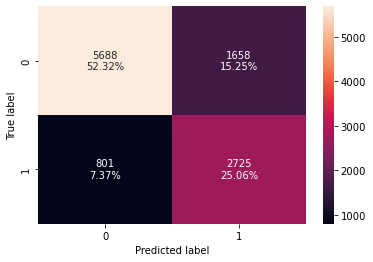

In [1270]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [1271]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.773823,0.77283,0.62172,0.689088


### Precision-Recall Curve

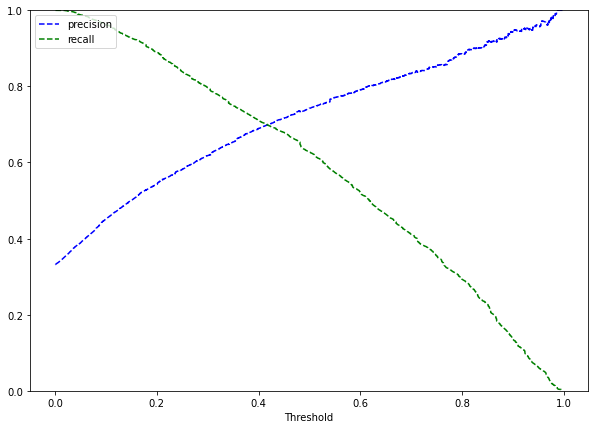

In [1272]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [1273]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

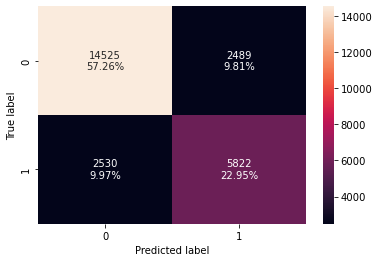

In [1274]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [1275]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.802137,0.697079,0.700517,0.698794


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

**Checking model performance on test set**

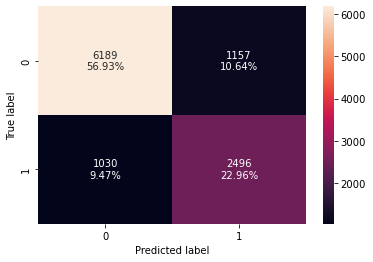

In [1276]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [1277]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.798841,0.707884,0.683274,0.695361


## Model Performance Comparison and Final Model Selection

In [1278]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.33 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.805764,0.782228,0.802137
Recall,0.627634,0.772150,0.697079
Precision,0.742598,0.640417,0.700517
F1,0.680293,0.700141,0.698794


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.33) is giving the best F1 score. Therefore it can be selected as the final model

## Building a Decision Tree model

In [1279]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36238 non-null  int64   
 1   no_of_children                        36238 non-null  int64   
 2   no_of_weekend_nights                  36238 non-null  int64   
 3   no_of_week_nights                     36238 non-null  int64   
 4   type_of_meal_plan                     36238 non-null  object  
 5   required_car_parking_space            36238 non-null  int64   
 6   room_type_reserved                    36238 non-null  object  
 7   lead_time                             36238 non-null  int64   
 8   arrival_year                          36238 non-null  int64   
 9   arrival_month                         36238 non-null  int64   
 10  market_segment_type                   36238 non-null  object  
 11  no

In [1280]:
df1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,DayofWeek
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,Offline,0,0,65.00,0,0,Monday
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,Online,0,0,106.68,1,0,Tuesday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,Online,0,0,60.00,0,1,Wednesday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,Online,0,0,100.00,0,1,Sunday
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,Online,0,0,94.50,0,1,Wednesday


Lets convert the columns with an 'object' datatype into categorical variables

In [1281]:
for feature in df1.columns: # Loop through all columns in the dataframe
    if df1[feature].dtype == 'object': # Only apply for columns with categorical strings
        df1[feature] = pd.Categorical(df1[feature])# Replace strings with an integer
df1.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,DayofWeek
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,Offline,0,0,65.00,0,0,Monday
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,Online,0,0,106.68,1,0,Tuesday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,Online,0,0,60.00,0,1,Wednesday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,Online,0,0,100.00,0,1,Sunday
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,Online,0,0,94.50,0,1,Wednesday
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,Online,0,0,115.00,1,1,Thursday
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,Online,0,0,107.55,1,0,Sunday
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,Online,0,0,105.61,1,0,Wednesday
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,Offline,0,0,96.90,1,0,Friday
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,Online,0,0,133.44,3,0,Thursday


In [1282]:
print(df1.type_of_meal_plan.value_counts())
print(df1.room_type_reserved.value_counts())
print(df1.market_segment_type.value_counts())
print(df1.DayofWeek.value_counts())
print(df1.arrival_year.value_counts())

Meal Plan 1     27802
Not Selected     5129
Meal Plan 2      3302
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28105
Room_Type 4     6049
Room_Type 6      964
Room_Type 2      692
Room_Type 5      263
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23194
Offline          10518
Corporate         2011
Complementary      390
Aviation           125
Name: market_segment_type, dtype: int64
Sunday       6135
Saturday     5419
Monday       5380
Wednesday    5120
Tuesday      4899
Friday       4741
Thursday     4544
Name: DayofWeek, dtype: int64
2018    29724
2017     6514
Name: arrival_year, dtype: int64


In [1283]:
replaceStruct = {
                "type_of_meal_plan":     {"Meal Plan 1": 1, "Meal Plan 2": 2 ,"Meal Plan 3": 3 ,"Not Selected":-1},
                "room_type_reserved": {"Room_Type 1": 3, "Room_Type 4":5 , "Room_Type 6": 7, "Room_Type 2": 2,"Room_Type 5": 4, "Room_Type 7":6, "Room_Type 3":1},
                #"market_segment_type": {"Online":1, "Offline":2, "Corporate":3, "Complementary":4, "Aviation":5}
                 #"DayofWeek": {"Sunday": 1, "Saturday":2 , "Monday": 3, "Wednesday": 4,"Tuesday": 5, "Friday": 6, "Thursday": 7 },
                 "arrival_year":     {"2018": 2, "2017": 1} , 
                 
                }

oneHotCols=["market_segment_type", "DayofWeek"]

**NOTE** - In the following cell, `drop_first = True` has not been set. We set `drop_first = True` in linear models to avoid multicollinearity. However, since the decision tree is a non-linear model, it is not affected by multicollinearity. 

It is always a good practice to set `drop_first = True` in all the models. However, in the case of non-linear models like decision trees, this step is not mandatory.

In [1284]:
HotelsData=df1.replace(replaceStruct)
HotelsData=pd.get_dummies(HotelsData, columns=oneHotCols)
HotelsData.head(10)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,2,0,1,2,1,0,3,224,2017,10,0,0,65.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,0,2,3,-1,0,3,5,2018,11,0,0,106.68,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,2,1,1,0,3,1,2018,2,0,0,60.00,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,2,0,0,2,1,0,3,211,2018,5,0,0,100.00,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,2,0,1,1,-1,0,3,48,2018,4,0,0,94.50,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5,2,0,0,2,2,0,3,346,2018,9,0,0,115.00,1,1,0,0,0,0,1,0,0,0,0,1,0,0
6,2,0,1,3,1,0,3,34,2017,10,0,0,107.55,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7,2,0,1,3,1,0,5,83,2018,12,0,0,105.61,1,0,0,0,0,0,1,0,0,0,0,0,0,1
8,3,0,0,4,1,0,3,121,2018,7,0,0,96.90,1,0,0,0,0,1,0,1,0,0,0,0,0,0
9,2,0,0,5,1,0,5,44,2018,10,0,0,133.44,3,0,0,0,0,0,1,0,0,0,0,1,0,0


In [1285]:
X = HotelsData.drop(["booking_status"], axis=1)
Y = HotelsData["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [1286]:
print("Shape of Training set : ", X_traindt.shape)
print("Shape of test set : ", X_testdt.shape)
print("Percentage of classes in training set:")
print(y_traindt.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_testdt.value_counts(normalize=True))

Shape of Training set :  (25366, 33)
Shape of test set :  (10872, 33)
Percentage of classes in training set:
0    0.67074
1    0.32926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.675681
1    0.324319
Name: booking_status, dtype: float64


* We had seen that around 67.07% of observations belongs to class 0 (Not-Cancelled) and 3.29% observations belongs to class 1 (Cancelled), and this is preserved in the train and test sets

### Decision Tree (default)

In [1287]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_traindt, y_traindt)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting the Hotel booking will not be cancelled but in reality, the Hotel booking will be cancelled (FN)
- Predicting the Hotel booking will be Cancelled but in reality, the Hotel booking will not fail (FP)

**Which case is more important?**

- If we predict that a Hotel booking will not be cancelled but in reality, the Hotel booking gets cancelled, then the company will have to bear the cost of resources for hotel maintainence and the hotel will also face payment losses from the customer.
- If we predict that a Hotel booking will be cancelled but in reality, the Hotel booking does not get cancelled, then the Hotel will have to make arrangements at the last moment.

**How to reduce the losses?**

The INN Hotel would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [1288]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [1289]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

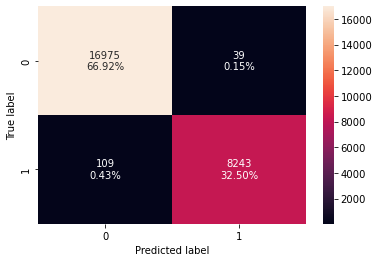

In [1290]:
confusion_matrix_sklearn(model0, X_traindt, y_traindt)

In [1291]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_traindt, y_traindt
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.994165,0.986949,0.995291,0.991103


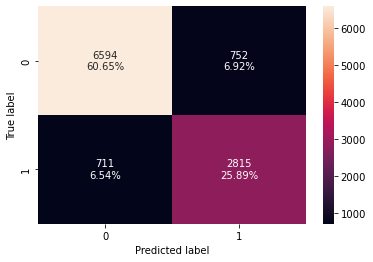

In [1292]:
confusion_matrix_sklearn(model0, X_testdt, y_testdt)

In [1293]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_testdt, y_testdt
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.865434,0.798355,0.789179,0.79374


### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [1294]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_traindt, y_traindt)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

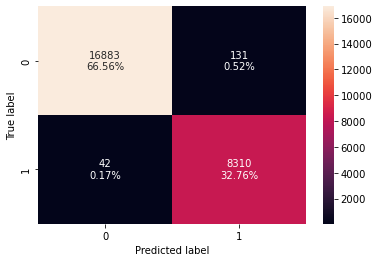

In [1295]:
confusion_matrix_sklearn(model, X_traindt, y_traindt)

In [1296]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_traindt, y_traindt
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99318,0.994971,0.984481,0.989698


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

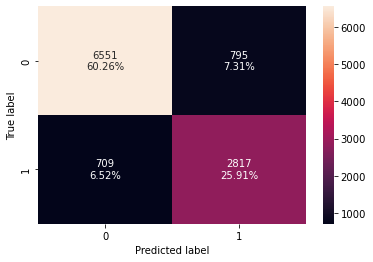

In [1297]:
confusion_matrix_sklearn(model, X_testdt, y_testdt)

In [1298]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_testdt, y_testdt
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.861663,0.798922,0.7799,0.789297


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Do we need to prune the tree?

**Yes, let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [1299]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

#{
 #   "class_weight": [None, "balanced"],
 #   "max_depth": np.arange(2, 7, 2),
  #  "max_leaf_nodes": [50, 75, 150, 250],
   # "min_samples_split": [10, 30, 50, 70],
#}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_traindt, y_traindt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_traindt, y_traindt)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

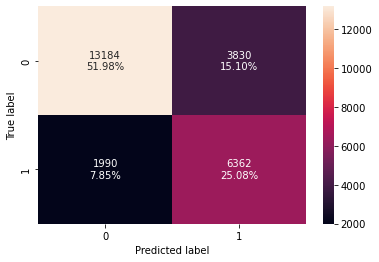

In [1300]:
confusion_matrix_sklearn(estimator, X_traindt, y_traindt)

In [1301]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_traindt, y_traindt
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.770559,0.761734,0.624215,0.686152


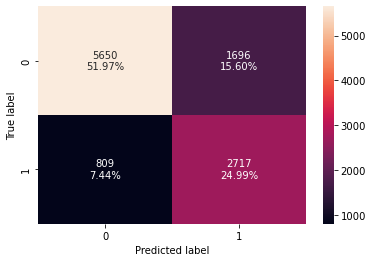

In [1302]:
confusion_matrix_sklearn(estimator, X_testdt, y_testdt)

In [1303]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_testdt, y_testdt
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.769592,0.770562,0.615681,0.684469


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.68 which shows that the model is able to generalize well on unseen data.

In [1304]:
feature_names = list(X_traindt.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

In [1305]:
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.55059381, 0.        , 0.        , 0.        , 0.        ,
       0.11897743, 0.12619792, 0.        , 0.        , 0.        ,
       0.        , 0.20423084, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

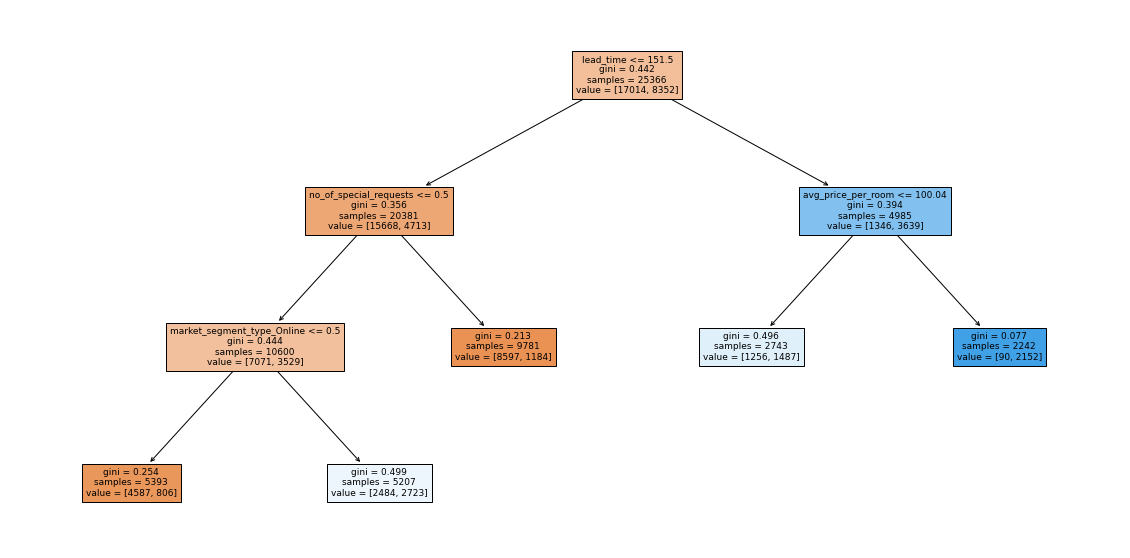

In [1306]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [1307]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4587.00, 806.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2484.00, 2723.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8597.00, 1184.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1256.00, 1487.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [90.00, 2152.00] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.50, the no_of_special_requests is less than or equal to 0.50, the market_segment_type-online is greater than 0.50 , then the hotel booking is most likely to be cancelled

`Interpretations from other decision rules can be made similarly`

In [1308]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.55059381, 0.        , 0.        , 0.        , 0.        ,
       0.11897743, 0.12619792, 0.        , 0.        , 0.        ,
       0.        , 0.20423084, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

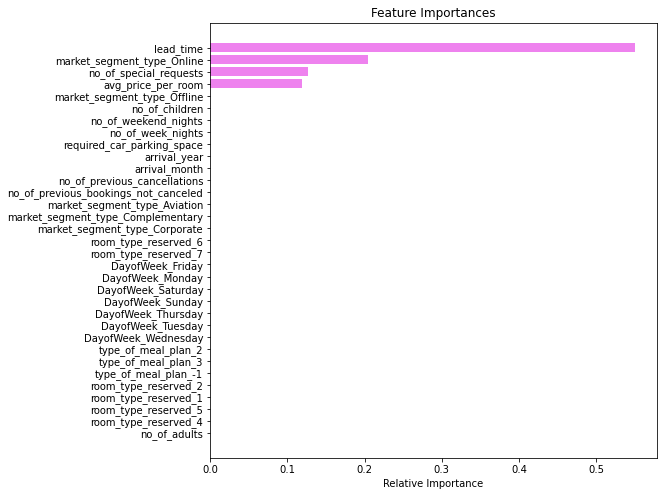

In [1309]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, lead time, market segment type online, no of special requests and avg price per room are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [1310]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_traindt, y_traindt)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [1311]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008474
1,3.262675e-20,0.008474
2,3.262675e-20,0.008474
3,3.262675e-20,0.008474
4,3.262675e-20,0.008474
...,...,...
1755,9.586702e-03,0.327413
1756,9.813817e-03,0.337227
1757,1.233775e-02,0.349565
1758,3.364076e-02,0.416846


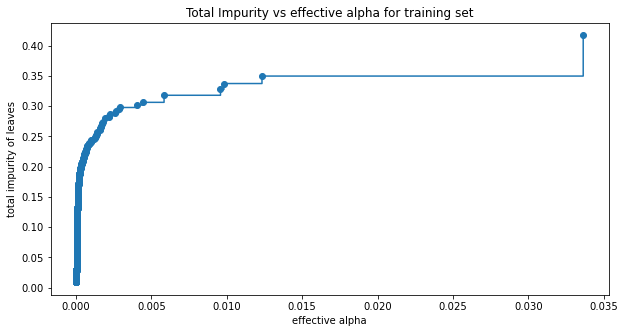

In [1312]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [1313]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_traindt, y_traindt)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08315396688288029


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

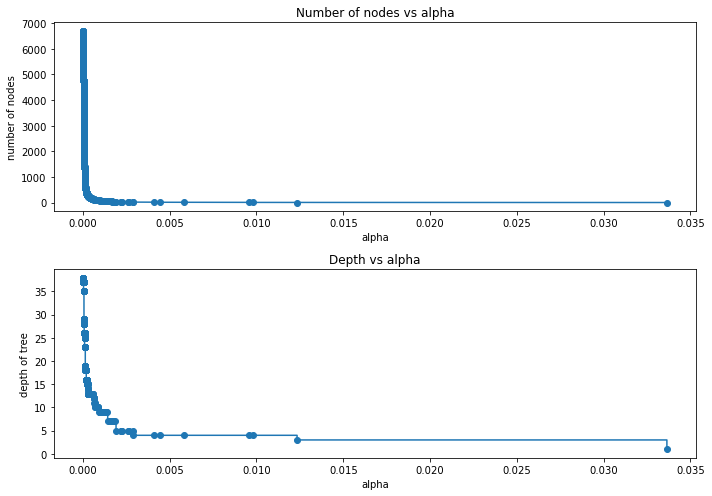

In [1314]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [1315]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_traindt)
    values_train = recall_score(y_traindt, pred_train)
    recall_train.append(values_train)

In [1316]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_testdt)
    values_test = recall_score(y_testdt, pred_test)
    recall_test.append(values_test)

In [1317]:
train_scores = [clf.score(X_traindt, y_traindt) for clf in clfs]
test_scores = [clf.score(X_testdt, y_testdt) for clf in clfs]

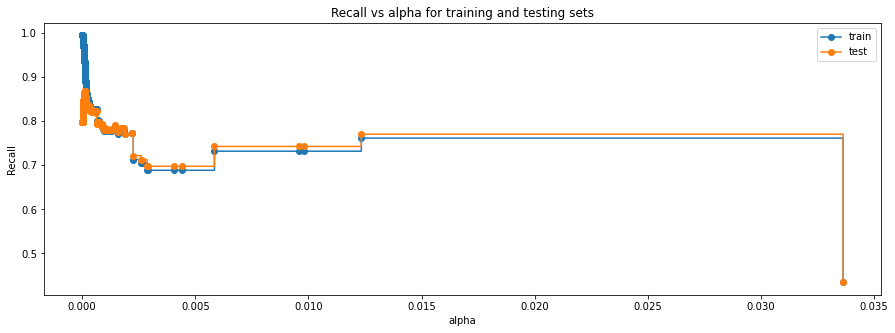

In [1318]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [1319]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012787997023366003,
                       class_weight='balanced', random_state=1)


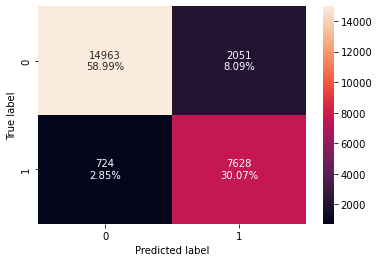

In [1320]:
confusion_matrix_sklearn(best_model, X_traindt, y_traindt)

In [1321]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_traindt, y_traindt
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.890602,0.913314,0.788098,0.846098


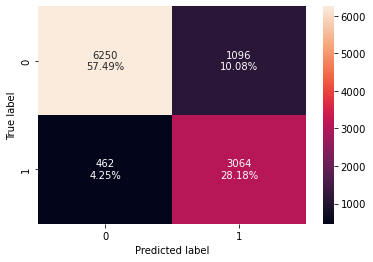

In [1322]:
confusion_matrix_sklearn(best_model, X_testdt, y_testdt)

In [1323]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_testdt, y_testdt
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.856696,0.868973,0.736538,0.797294


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming in the range from 0.87 to 0.91 which shows that the model is able to generalize well on unseen data.

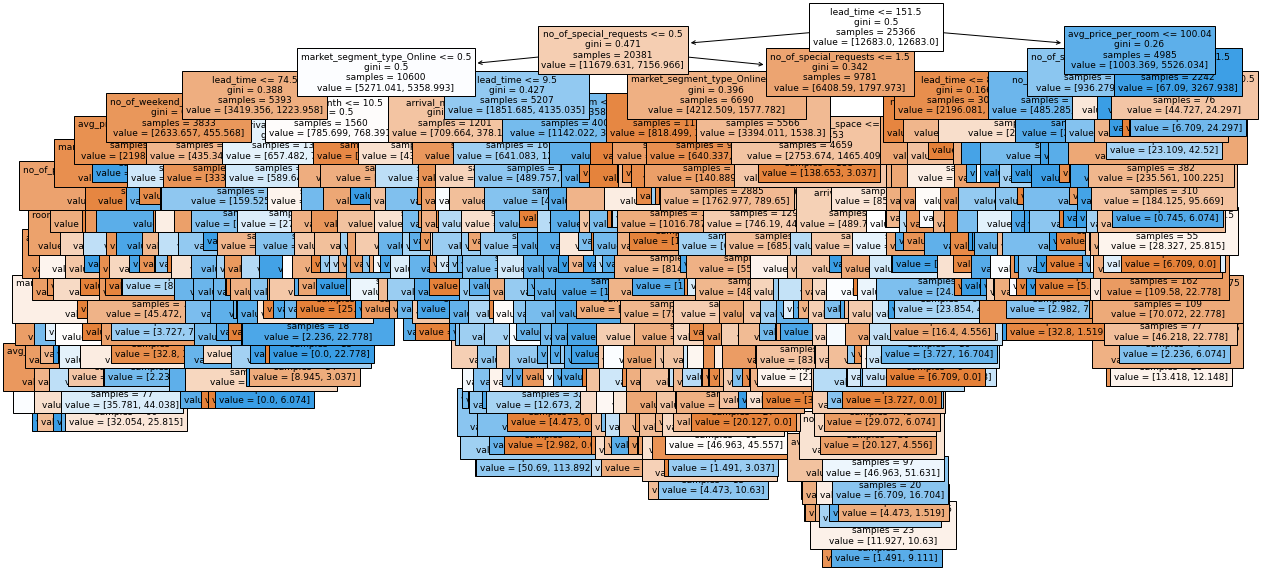

In [1324]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [1325]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- no_of_previous_bookings_not_canceled <= 0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 59.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [55.91, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  59.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 83.00
|   |   |   |   |   |   |   |  

In [1326]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

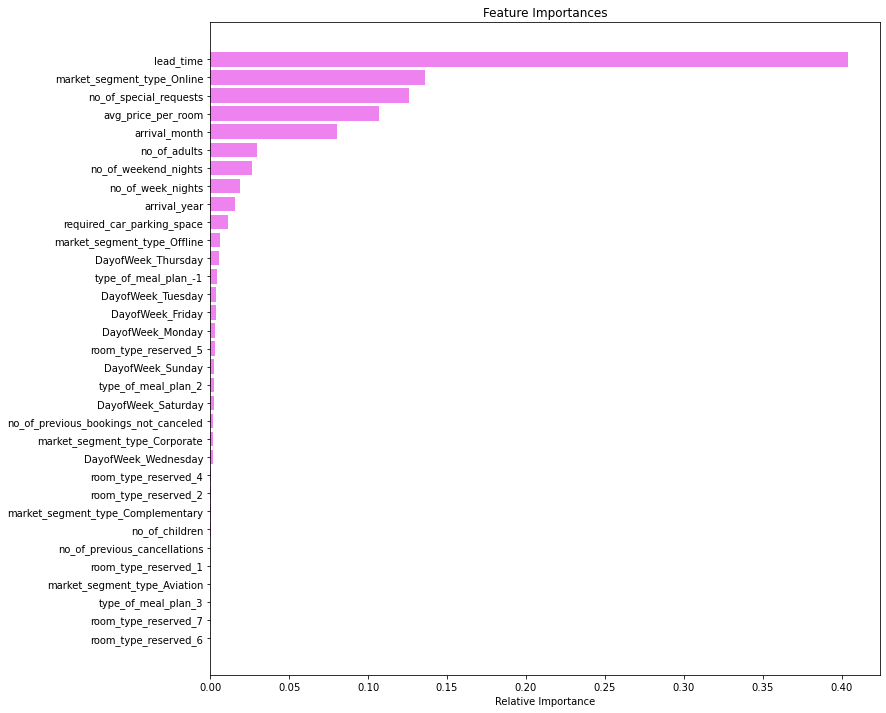

In [1327]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead Time and Market Segment Type Online are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [1328]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994165,0.993180,0.770559,0.890602
Recall,0.986949,0.994971,0.761734,0.913314
Precision,0.995291,0.984481,0.624215,0.788098
F1,0.991103,0.989698,0.686152,0.846098


In [1329]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.865434,0.861663,0.769592,0.856696
Recall,0.798355,0.798922,0.770562,0.868973
Precision,0.789179,0.779900,0.615681,0.736538
F1,0.793740,0.789297,0.684469,0.797294


* Decision tree models with post-pruning is giving high recall socres on both training and test sets as compared to pre-pruning recall scores.
* However, we will choose the post pruned tree as the best model since it is giving a  high recall score, precisoin score, F1 score and accuracy on the train and test sets than the pre-pruned tree. 

## Actionable Insights and Recommendations

- The model built can be used to predict if a hotel booking is going to be cancelled or not and can correctly identify 86.8% of the cancellations

- Lead Time , Market Segment Type Online, average price per room, number of special requests and arrival month are the most important features for predicting whether a hotel booking will be cancelled or not

- From the decision tree, it has been observed that if the lead time is less than or equal to 151.50, the average price per room is greater than 100.04, the arrival_month is less than or equal to 11.50 and the number of special requests is lesser than or equal to 2.50, then the hotel booking is most likely to be canceled.
  - The InnHotels should give a vigilant eye for these values in order to anticipate booking cancellation.
  
- From the decision tree, it has been observed that if the lead time is greater than 151.50, the average price per room is less than 81.34, the number of special requests is lesser than or equal to 0.50 and the number of adult greater than or equal to 2 and the market segment type online is greater than 0.50 then the hotel booking is most likely not be canceled.

- InnHotels should give promotional offers to repeating guests as they rarely cancels any bookings.

- InnHotels should focus on online market segment to attract more customers by providing promotional offers

- InnHotels should add more resources and promotional offers during peak season of October and September month.

- InnHotels should add extra special request categories to online portal to attract more people.
